# 데이터로드

In [ ]:
#구글 코랩 pro +를 활용
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
#종합주가지수 데이터 불러오기
kospi = pd.read_csv('/content/drive/MyDrive/competitions/kospi/kospi_data.csv')

## EDA

In [ ]:
kospi.head(10)

Date  Close   Open   High    Low     Volume  Change
0  1981-05-01  123.6  123.6  123.6  123.6  3330000.0  0.0098
1  1981-05-02  123.5  123.5  123.5  123.5  2040000.0 -0.0008
2  1981-05-04  120.6  120.6  120.6  120.6  1930000.0 -0.0235
3  1981-05-06  120.7  120.7  120.7  120.7  1690000.0  0.0008
4  1981-05-07  119.3  119.3  119.3  119.3  1480000.0 -0.0116
5  1981-05-08  118.7  118.7  118.7  118.7  1090000.0 -0.0050
6  1981-05-09  118.8  118.8  118.8  118.8   598000.0  0.0008
7  1981-05-12  118.8  118.8  118.8  118.8   543000.0  0.0000
8  1981-05-13  119.9  119.9  119.9  119.9   858000.0  0.0093
9  1981-05-14  121.5  121.5  121.5  121.5  1180000.0  0.0133

In [ ]:
#결측치 확인
kospi.isna().sum()

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

In [ ]:
# 종가와 거래량 제외하고 전부 제거
kospi.drop(['Open', 'High','Low','Change'], axis=1, inplace=True)

본 분석 및 시각화에는 종합주가지수의 종가와 거래량만을 중점으로 진행하였습니다.

In [ ]:
#날짜를 datetime으로 변환
kospi['Date'] = pd.to_datetime(kospi['Date'])

In [ ]:
kospi

Date    Close       Volume
0     1981-05-01   123.60    3330000.0
1     1981-05-02   123.50    2040000.0
2     1981-05-04   120.60    1930000.0
3     1981-05-06   120.70    1690000.0
4     1981-05-07   119.30    1480000.0
...          ...      ...          ...
11019 2022-08-25  2477.26  426230000.0
11020 2022-08-26  2481.03  520090000.0
11021 2022-08-29  2426.89  448750000.0
11022 2022-08-30  2450.93     327210.0
11023 2022-08-31  2472.05     397290.0

[11024 rows x 3 columns]

## 전체적인 시각화

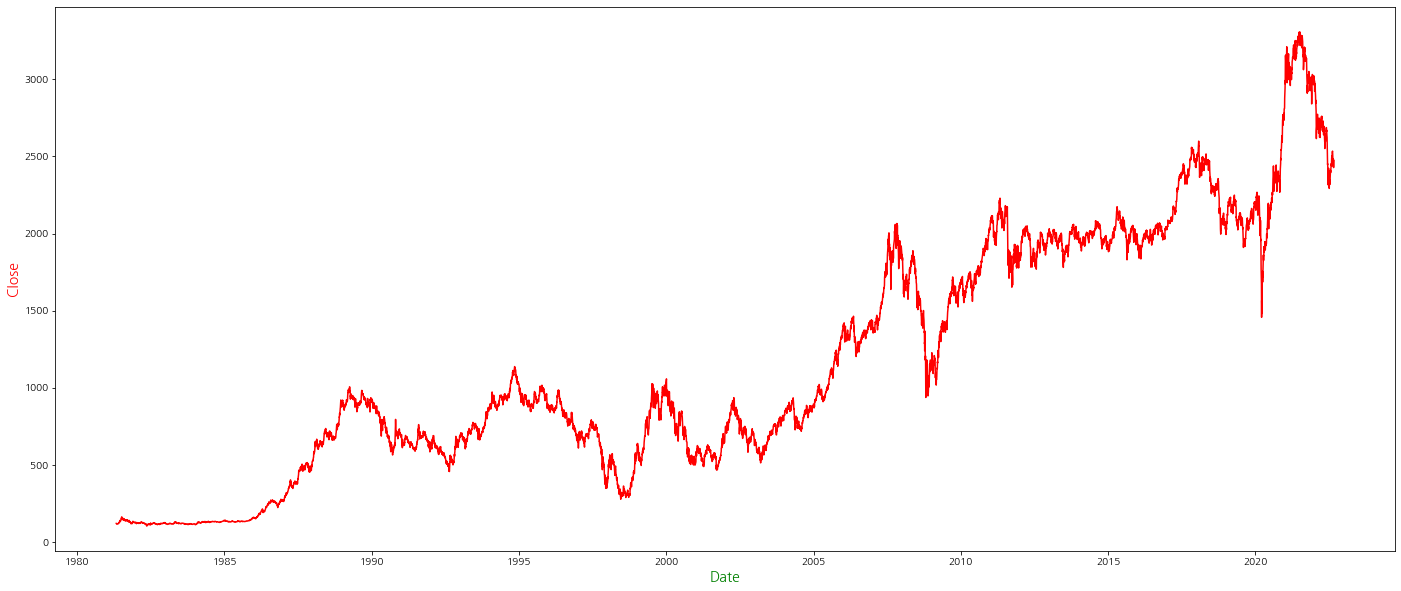

In [ ]:
#종가 추이 시각화

fig = plt.figure(figsize=(24,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.set_xlabel('Date', fontsize=14, color='green')
ax.set_ylabel('Close', fontsize=14, color='red')

ax.plot(kospi['Date'],kospi['Close'],color = 'red',  linestyle = 'solid')

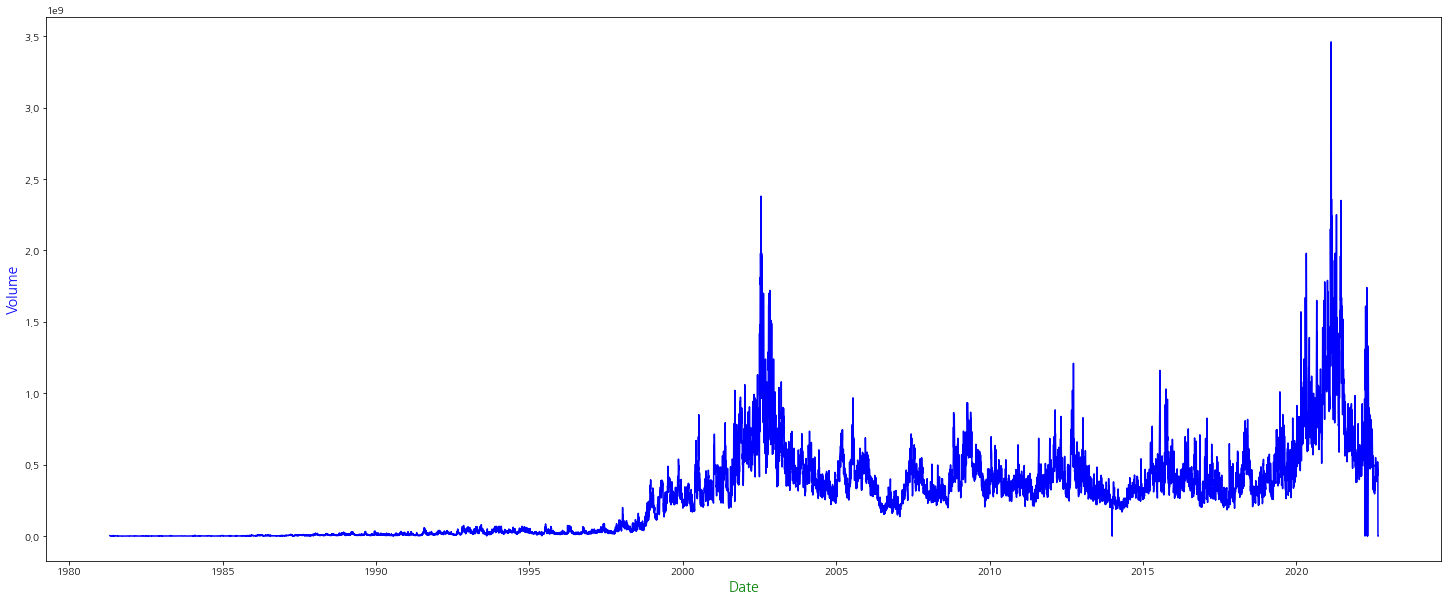

In [ ]:
#거래량

fig = plt.figure(figsize=(25,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.set_xlabel('Date', fontsize=14, color='green')
ax.set_ylabel('Volume', fontsize=14, color='blue')

ax.plot(kospi['Date'],kospi['Volume'],color = 'blue',  linestyle = 'solid')


# **1. 분야별 검색량**

분야별 검색량이 종합주가지수에 어떤 영향을 미치는지 분석하고자 하였습니다.

포털사이트는 구글, 데이터 수집 지역은 한국을 대상으로 하였고\
구글 데이터 트렌드를 활용하였습니다.



## 데이터로드 및 EDA

데이터는 2004년 1월부터 2022년 8월까지 월별 검색량을\
주제를 사회, 정치, 경제로 나눠 분야별로 수집하였고 최대값을 100으로 정규화하였습니다.



In [ ]:
google = pd.read_csv('/content/drive/MyDrive/competitions/kospi/google.csv')

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    224 non-null    object
 1   사회      224 non-null    int64 
 2   정치      224 non-null    int64 
 3   경제      224 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.1+ KB


In [ ]:
google.head(10)

Date  사회   정치  경제
0  2004-01-01  57   72  77
1  2004-02-01  46   39  61
2  2004-03-01  97  100  76
3  2004-04-01  94  100  97
4  2004-05-01  94   70  82
5  2004-06-01  85   76  75
6  2004-07-01  58   56  57
7  2004-08-01  48   50  59
8  2004-09-01  62   71  75
9  2004-10-01  85   67  82

In [ ]:
google.tail(10)

Date  사회  정치  경제
214  2021-11-01  39  38  23
215  2021-12-01  32  36  22
216  2022-01-01  29  34  20
217  2022-02-01  30  39  21
218  2022-03-01  42  54  23
219  2022-04-01  48  43  24
220  2022-05-01  44  40  26
221  2022-06-01  39  38  27
222  2022-07-01  36  32  24
223  2022-08-01  28  32  19

In [ ]:
#Column name 변환
google = google.rename(columns={'사회':'society', '정치':'politics', '경제': 'economy'})

In [ ]:
#결측치 확인
google.isna().sum()

Date        0
society     0
politics    0
economy     0
dtype: int64

In [ ]:
#datetime으로 변환
google['Date'] = pd.to_datetime(google['Date'])

### 상관관계 분석 및 간단 시각화

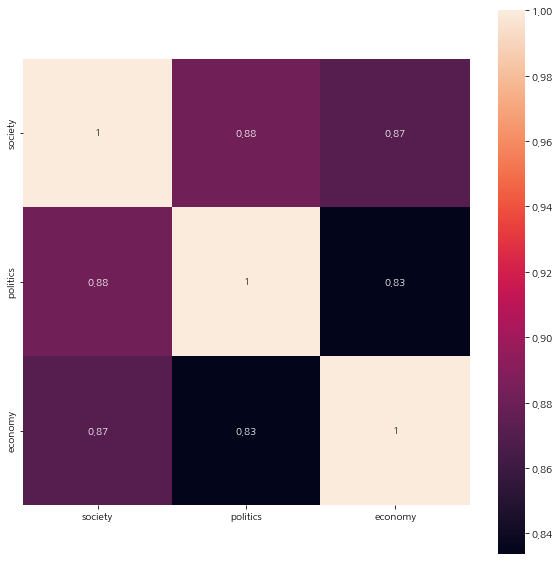

In [ ]:
#상관관계 분석
fig = plt.figure(figsize=[10,10])
ax = sns.heatmap(google.corr(),annot=True,square=True)

Text(0.5, 1.0, 'search')

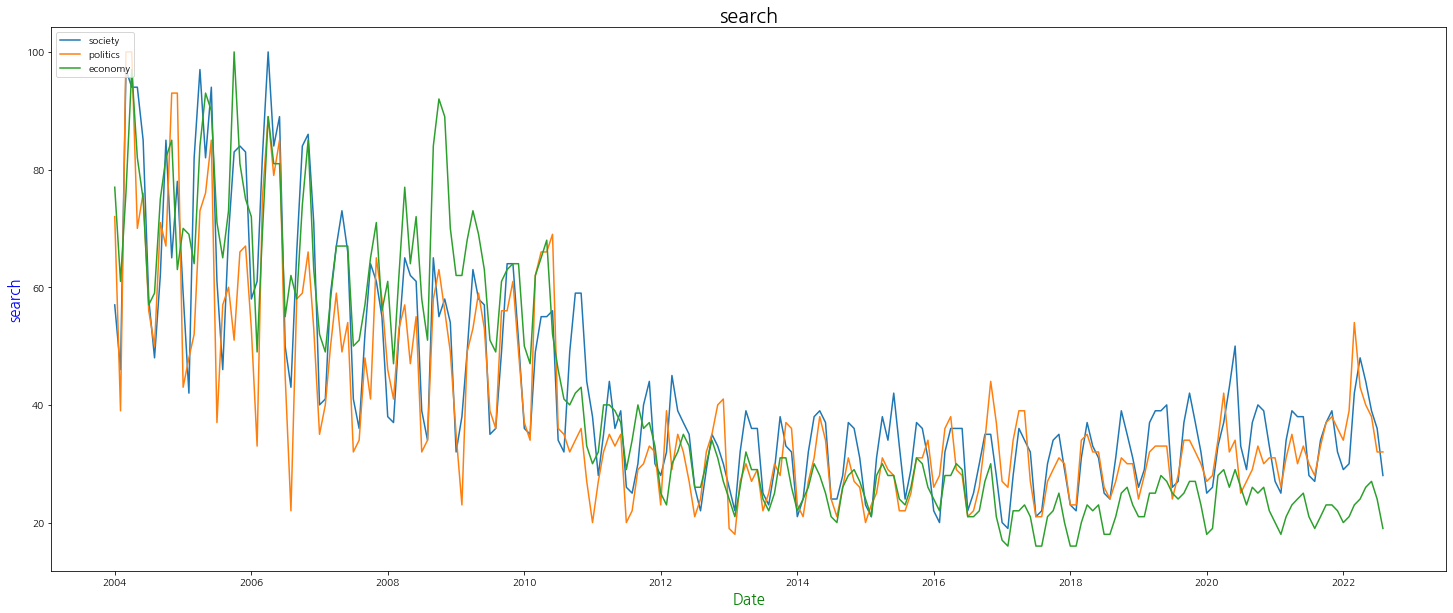

In [ ]:
#데이터프레임 시각화
fig = plt.figure(figsize=(25,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.plot(google['Date'],google['society'], label="society")
ax.plot(google['Date'],google['politics'], label="politics")
ax.plot(google['Date'],google['economy'], label="economy")
ax.set_xlabel('Date', fontsize=15, color='green')
ax.set_ylabel('search', fontsize=15, color='blue')
plt.legend(loc = 2)
plt.title('search',fontsize=20) 

## 종합주가지수와 비교 분석

In [ ]:
kospi_s = kospi[kospi['Date'].between('2004-01', '2022-09')] #구글 검색 통계랑 구간과 동일하게 맞춰주기
kospi_s

Date    Close       Volume
6405  2004-01-02   821.26  307490000.0
6406  2004-01-05   824.10  408260000.0
6407  2004-01-06   823.43  484060000.0
6408  2004-01-07   827.07  404560000.0
6409  2004-01-08   824.15  428760000.0
...          ...      ...          ...
11019 2022-08-25  2477.26  426230000.0
11020 2022-08-26  2481.03  520090000.0
11021 2022-08-29  2426.89  448750000.0
11022 2022-08-30  2450.93     327210.0
11023 2022-08-31  2472.05     397290.0

[4619 rows x 3 columns]

In [ ]:
kospi_m = kospi_s.groupby(kospi_s['Date'].dt.strftime("%Y-%m")).mean() #월 평균별로 묶어주기
print(kospi_m)

               Close        Volume
Date                              
2004-01   845.529444  4.240511e+08
2004-02   867.451500  4.829750e+08
2004-03   875.578182  4.387127e+08
2004-04   907.142500  4.389820e+08
2004-05   798.787895  3.553137e+08
...              ...           ...
2022-04  2703.242857  9.540277e+08
2022-05  2628.338571  8.030019e+08
2022-06  2474.948500  6.007340e+08
2022-07  2362.794762  3.788405e+08
2022-08  2479.571364  4.089016e+08

[224 rows x 2 columns]


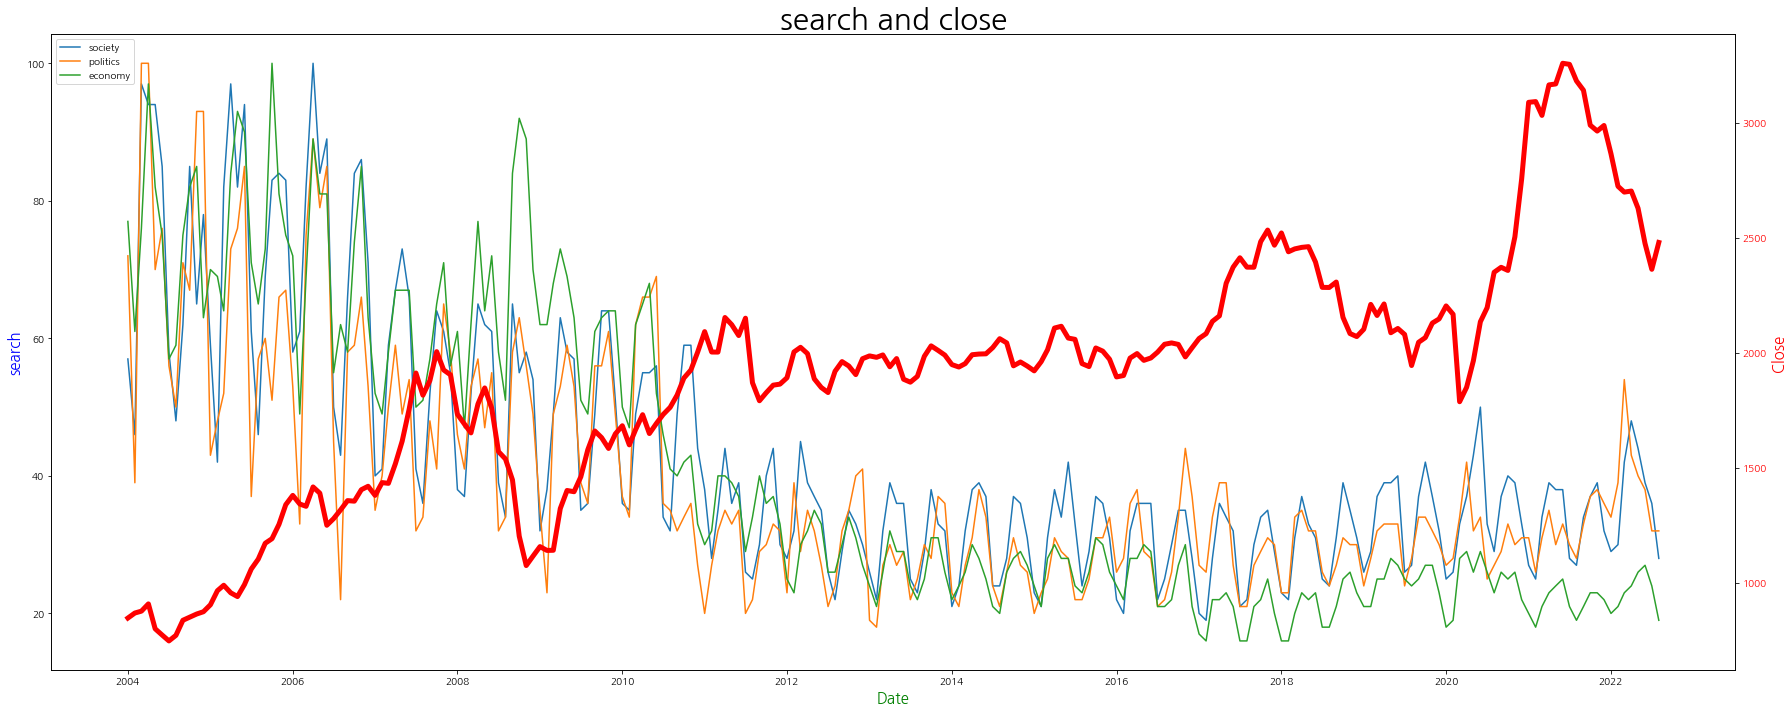

In [ ]:
# 구글 검색 분야 별 코스피 종가 그래프

fig = plt.figure(figsize=(25,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.plot(google['Date'],google['society'], label="society")
ax.plot(google['Date'],google['politics'], label="politics")
ax.plot(google['Date'],google['economy'], label="economy")
ax.set_xlabel('Date', fontsize=15, color='green')
ax.set_ylabel('search', fontsize=15, color='blue')
plt.legend(loc = 2)
plt.title('search and close',fontsize=30) 

ax2 = ax.twinx()
ax2.plot(google['Date'], kospi_m['Close'], color='red', linewidth = 5)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Close', fontsize=15, color='red')


fig.tight_layout()
plt.show()

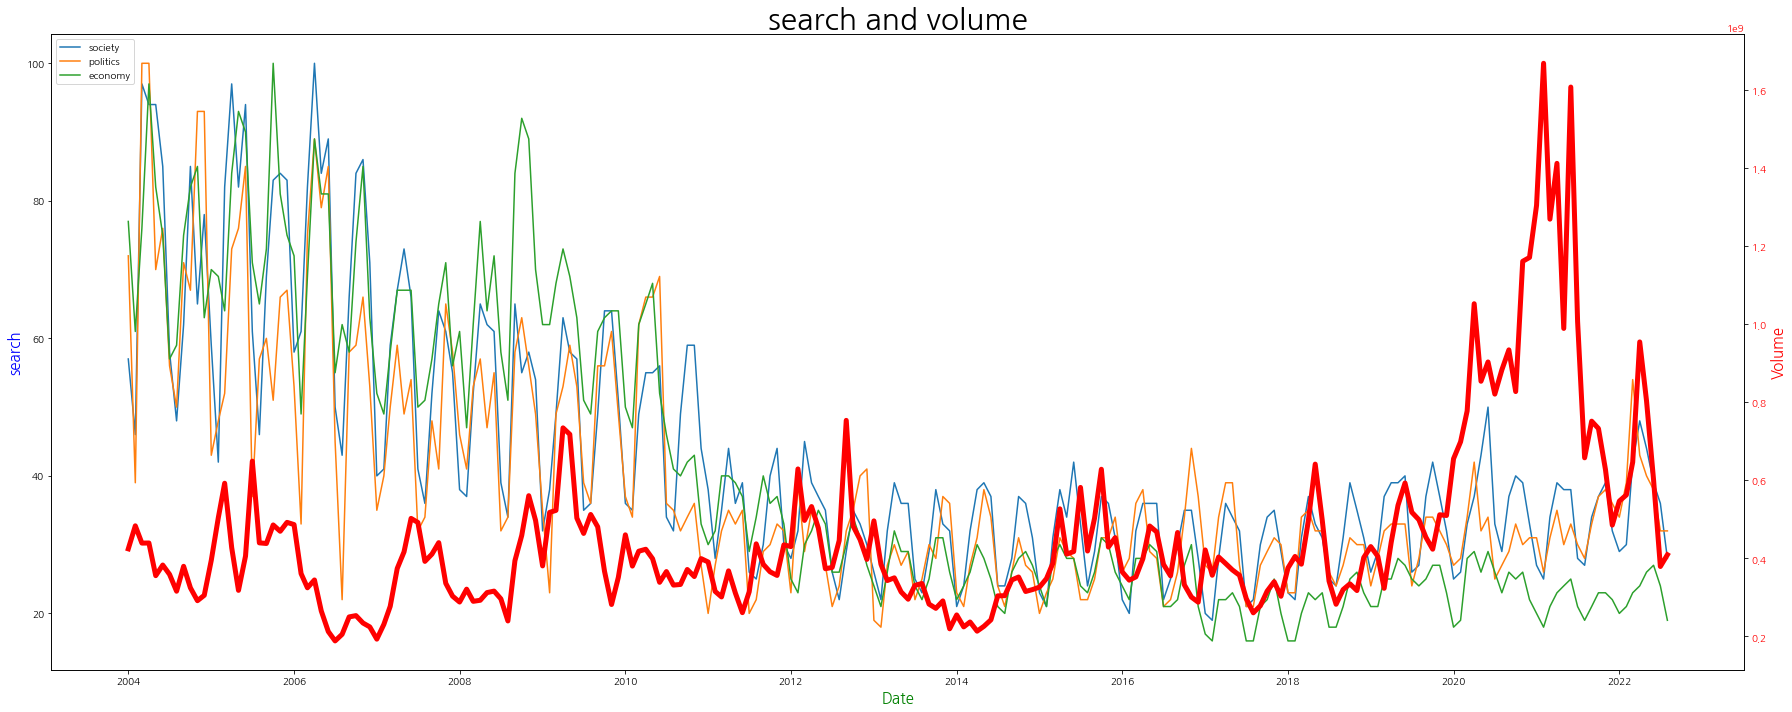

In [ ]:
# 구글 검색 분야 별 코스피 거래량 그래프

fig = plt.figure(figsize=(25,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.plot(google['Date'],google['society'], label="society")
ax.plot(google['Date'],google['politics'], label="politics")
ax.plot(google['Date'],google['economy'], label="economy")
ax.set_xlabel('Date', fontsize=15, color='green')
ax.set_ylabel('search', fontsize=15, color='blue')
plt.legend(loc = 2)
plt.title('search and volume',fontsize=30) 

ax2 = ax.twinx()
ax2.plot(google['Date'], kospi_m['Volume'], color='red', linewidth = 5)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Volume', fontsize=15, color='red')


fig.tight_layout()
plt.show()

\
분야별 검색량은 다르지만 시기별로 나타나는 검색량의 변화 추세는 분야에 상관없이 일치하는 것을 알 수 있습니다.

물론 검색량을 정규화하여 표현하였기에 종합주가지수 종가의 값과는 비교할 수 없지만\
각 분야별 검색량의 증감폭과 종합주가지수 종가의 증감폭이 얼추 일치하다는 것을 알 수 있습니다.

반대로 종합주가지수 거래량과는 완전히 일치한다고 볼 수 없습니다.\
오히려 반대로 분야별 검색량이 증가하였을 때 종합주가지수의 거래량은 감소하는 경우도 적지 않게 볼 수 있습니다\.






# **2. 분야별 뉴스량**

빅카인즈의 뉴스 데이터를 활용해 연도별, 분야별로 나누어 종합주가지수에 어떤 영향을 미치는지 분석해보고자 하였습니다.

데이터의 분류와 가시성을 생각해 분야를 정치, 경제, 사회, 문화, 국제, 지역, 스포츠, IT_과학 그리고\
범죄, 사고, 재해로 나누어 추출하였고 추출 언론은 전국일간지를 대상으로 하였습니다.

## 데이터 로드

1990년 1월부터 2022년 10월까지의 뉴스 개수를 연도별로 나눴습니다.

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/competitions/kospi/news.csv', encoding = 'cp949')

In [ ]:
# 뉴스 데이터 결측치 찾기

news.isnull().sum()

Date     0
정치       0
경제       0
사회       0
문화       0
국제       0
지역       0
스포츠      0
IT_과학    0
범죄       0
사고       0
재해       0
dtype: int64

In [ ]:
# 뉴스데이터가 있는 1990년부터의 kospi 데이터만 불러오기

kospi['year'] = kospi['Date'].dt.strftime('%Y')
year_m = kospi.groupby('year').mean()
kospi_for_news = year_m[9:]

## 분야별 뉴스 개수와 코스피 종가의 관계 시각화

분석 전,   가지고 있는 뉴스 개수 데이터 자체의 시각화 먼저 진행해보았습니다.

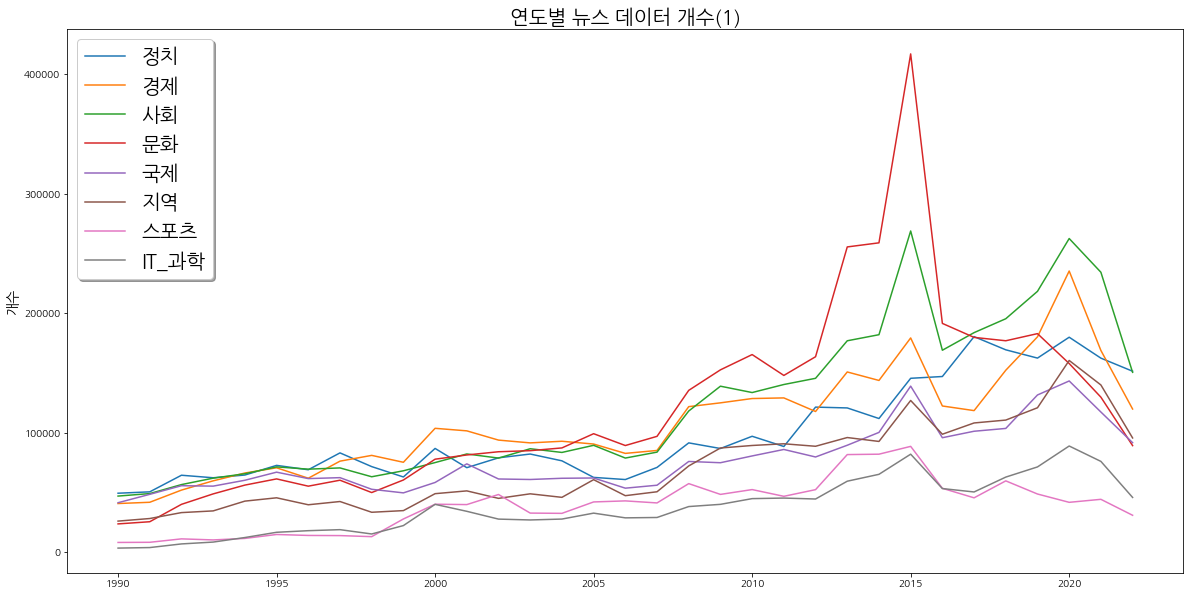

In [ ]:
# 범죄, 사고, 재해 분야를 제외한 뉴스 개수 시각화

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
ax.plot(news['Date'],news['정치'], label="정치")
ax.plot(news['Date'],news['경제'], label="경제")
ax.plot(news['Date'],news['사회'], label="사회")
ax.plot(news['Date'],news['문화'], label="문화")
ax.plot(news['Date'],news['국제'], label="국제")
ax.plot(news['Date'],news['지역'], label="지역")
ax.plot(news['Date'],news['스포츠'], label="스포츠")
ax.plot(news['Date'],news['IT_과학'], label="IT_과학")
ax.set_ylabel('개수', fontsize=14, color='black')

plt.title('연도별 뉴스 데이터 개수(1)',fontsize=20)

plt.legend(loc = 2, fontsize=20, frameon=True, shadow=True)

plt.show()

전체적으로 뉴스의 개수는 조금씩 많아지는 추세이고\
특히 2015년경 크게 상승하였다가 다시 줄어든 것을 알 수 있습니다.

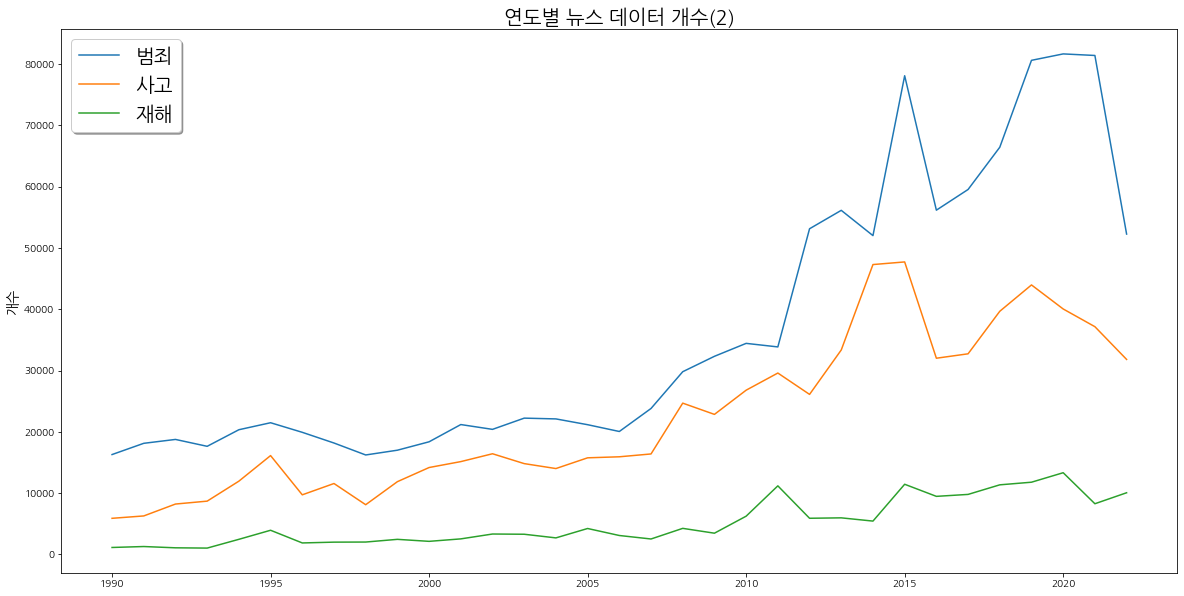

In [ ]:
# 범죄, 사고, 재해 분야 뉴스 개수 시각화

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.plot(news['Date'],news['범죄'], label="범죄")
ax.plot(news['Date'],news['사고'], label="사고")
ax.plot(news['Date'],news['재해'], label="재해")
ax.set_ylabel('개수', fontsize=14, color='black')

plt.title('연도별 뉴스 데이터 개수(2)',fontsize=20) 

plt.legend(loc = 2, fontsize=20, frameon=True, shadow=True)

plt.show()

전체적으로 뉴스의 개수가 많아지고 있고 범죄, 사고, 재해를 제외한 분야와 달리\
2015년 이후에도 계속해서 증가하는 추세임을 알 수 있습니다.

다음으로, 위 그래프에 코스피 종가의 그래프를 표시해 전체적인 추세를 한눈에 보기 쉽게 표현하였습니다. 코스피 종가의 그래프는 빨간 굵은 선입니다.

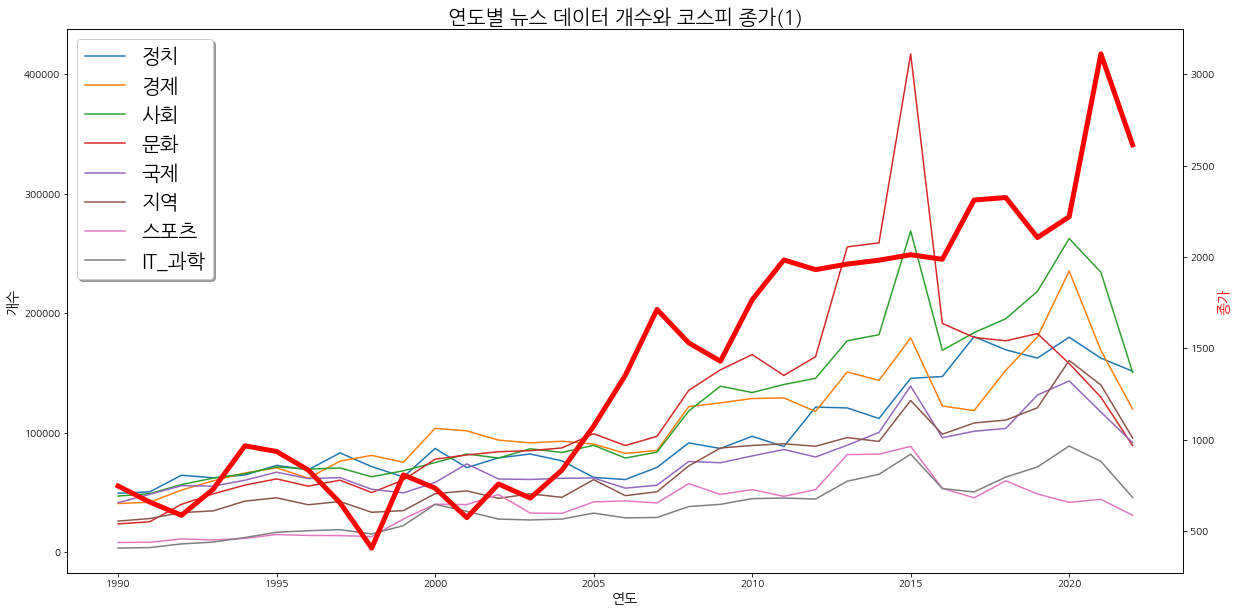

In [ ]:
# 범죄, 사고, 재해 분야를 제외한 뉴스 개수와 코스피 종가의 관계 시각화

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.plot(news['Date'],news['정치'], label="정치")
ax.plot(news['Date'],news['경제'], label="경제")
ax.plot(news['Date'],news['사회'], label="사회")
ax.plot(news['Date'],news['문화'], label="문화")
ax.plot(news['Date'],news['국제'], label="국제")
ax.plot(news['Date'],news['지역'], label="지역")
ax.plot(news['Date'],news['스포츠'], label="스포츠")
ax.plot(news['Date'],news['IT_과학'], label="IT_과학")
ax.set_ylabel('개수', fontsize=14, color='black')
ax.set_xlabel('연도', fontsize=14, color='black')

plt.legend(loc = 2, fontsize=20, frameon=True, shadow=True)

plt.title('연도별 뉴스 데이터 개수와 코스피 종가(1)',fontsize=20)

ax2 = ax.twinx()
ax2.set_ylabel('종가', fontsize=14, color='red')
ax2.plot(news['Date'], kospi_for_news['Close'], color='red', linewidth = 5)

plt.show()

전체적으로 주가가 상승한다는 점이 비슷해 보이지만, 주가의 상승폭이 상대적으로 더 큰 것을 알 수 있습니다\
또 2015년 이후 주춤한 뉴스의 개수와는 달리 주가는 여전히 상승하고 있음을 찾아볼 수 있습니다.

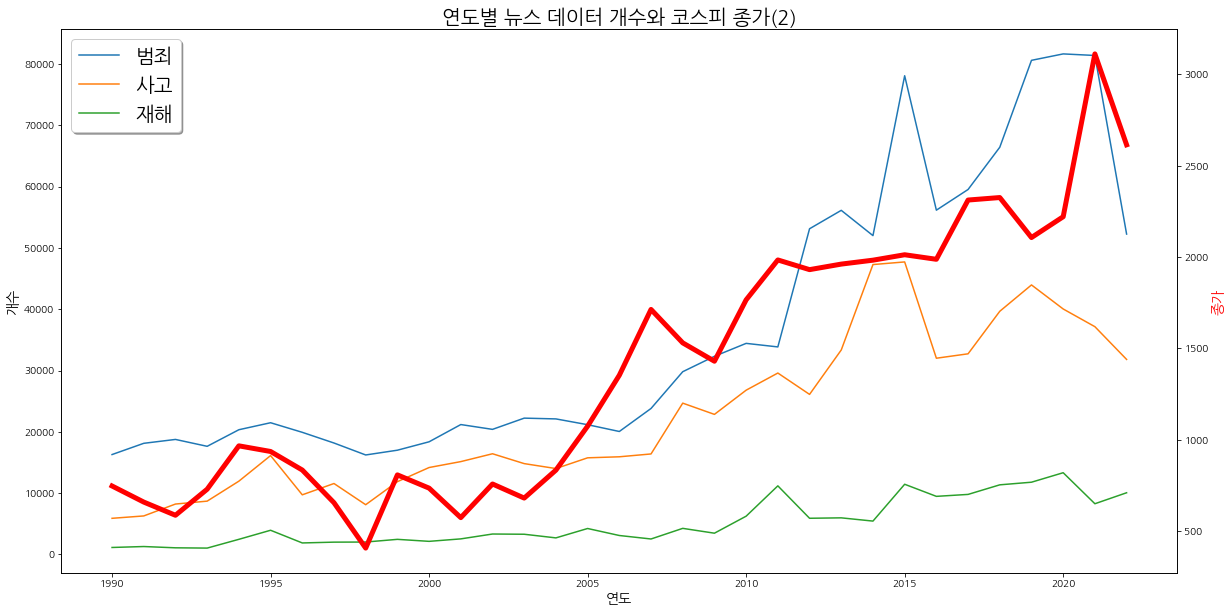

In [ ]:
# 범죄, 사고, 재해 분야 뉴스 개수와 코스피 종가의 관계 시각화

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.plot(news['Date'],news['범죄'], label="범죄")
ax.plot(news['Date'],news['사고'], label="사고")
ax.plot(news['Date'],news['재해'], label="재해")
ax.set_ylabel('개수', fontsize=14, color='black')
ax.set_xlabel('연도', fontsize=14, color='black')

plt.title('연도별 뉴스 데이터 개수와 코스피 종가(2)',fontsize=20)

plt.legend(loc = 2, fontsize=20, frameon=True, shadow=True)

ax2 = ax.twinx()
ax2.set_ylabel('종가', fontsize=14, color='red')
ax2.plot(news['Date'], kospi_for_news['Close'], color='red', linewidth = 5)

plt.show()

우선 전체적으로 그래프들의 모양이 비슷한 것이 눈에 띕니다\
범죄와 사고 분야의 뉴스 개수는 특히 더 주가와 유사한 흐름을 가짐을 알 수 있습니다.

## 분야별 뉴스 개수와 코스피 거래량의 관계 시각화

이번에는 코스피 거래량의 그래프를 표시해 전체적인 추세를 한눈에 보기 쉽게 표현하였습니다. 코스피 거래량의 그래프는 파란 굵은 선입니다.

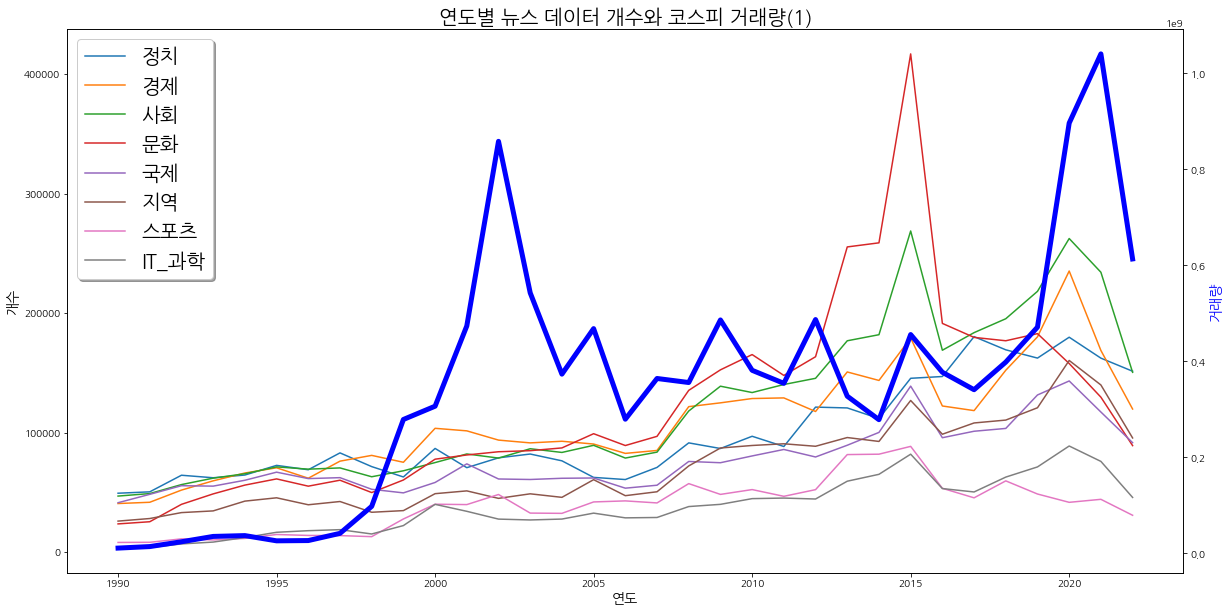

In [ ]:
# 범죄, 사고, 재해 분야를 제외한 뉴스 개수와 코스피 거래량의 관계 시각화

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.plot(news['Date'],news['정치'], label="정치")
ax.plot(news['Date'],news['경제'], label="경제")
ax.plot(news['Date'],news['사회'], label="사회")
ax.plot(news['Date'],news['문화'], label="문화")
ax.plot(news['Date'],news['국제'], label="국제")
ax.plot(news['Date'],news['지역'], label="지역")
ax.plot(news['Date'],news['스포츠'], label="스포츠")
ax.plot(news['Date'],news['IT_과학'], label="IT_과학")
ax.set_ylabel('개수', fontsize=14, color='black')
ax.set_xlabel('연도', fontsize=14, color='black')

plt.legend(loc = 2, fontsize=20, frameon=True, shadow=True)

plt.title('연도별 뉴스 데이터 개수와 코스피 거래량(1)',fontsize=20)

ax2 = ax.twinx()
ax2.set_ylabel('거래량', fontsize=14, color='blue')
ax2.plot(news['Date'], kospi_for_news['Volume'], color='blue', linewidth = 5)

plt.show()

뉴스 개수와 거래량의 추세를 비교해 보았을 때, 특별한 점을 찾지 못했습니다.

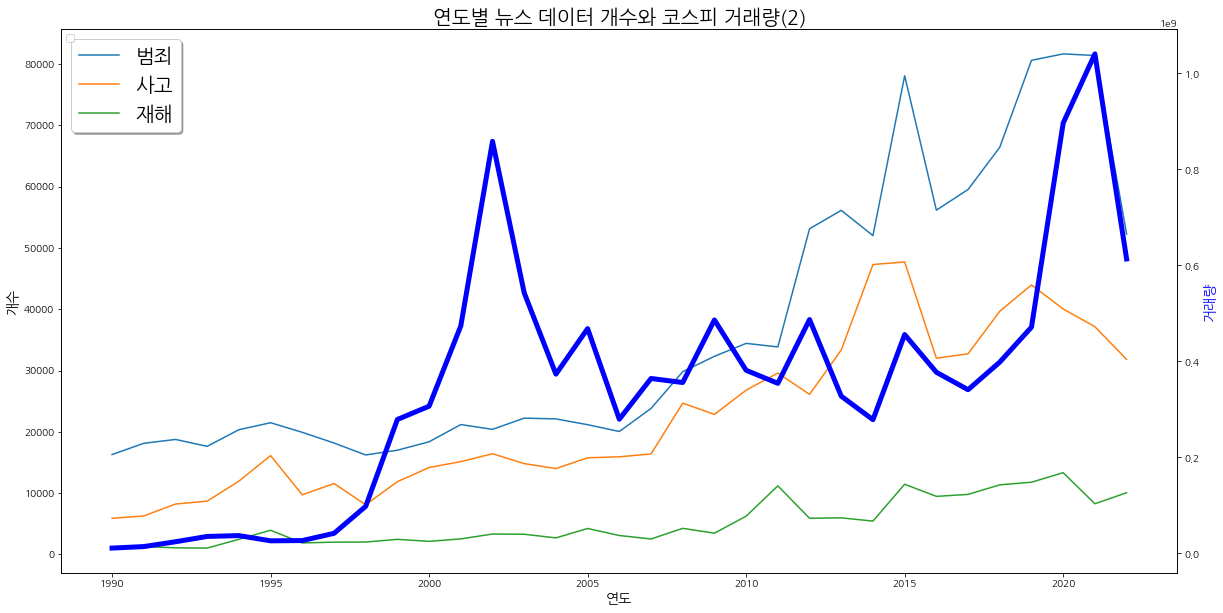

In [ ]:
# 범죄, 사고, 재해 분야 뉴스 개수와 코스피 거래량의 관계 시각화

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white') 
ax = fig.add_subplot() 

ax.plot(news['Date'],news['범죄'], label="범죄")
ax.plot(news['Date'],news['사고'], label="사고")
ax.plot(news['Date'],news['재해'], label="재해")
ax.set_ylabel('개수', fontsize=14, color='black')
ax.set_xlabel('연도', fontsize=14, color='black')

plt.title('연도별 뉴스 데이터 개수와 코스피 거래량(2)',fontsize=20) 

plt.legend(loc = 2, fontsize=20, frameon=True, shadow=True)

ax2 = ax.twinx()
ax2.set_ylabel('거래량', fontsize=14, color='blue')
ax2.plot(news['Date'], kospi_for_news['Volume'], color='blue', linewidth = 5)

plt.legend(loc = 2)

plt.show()

2000년대 초반과 2020년경 치솟았던 거래량과는 달리, 뉴스의 개수는 2020년도에만 급격히 많아진 것을 볼 수 있습니다.

## 분야별 뉴스 개수의 상관관계 히트맵

In [ ]:
news1 = news.loc[:, ['정치',	'경제',	'사회',	'문화',	'국제',	'지역',	'스포츠',	'IT_과학'	]]
news2 = news.loc[:, ['범죄', '사고', '재해']]

Text(0.5, 1.0, '분야별 뉴스 개수의 상관관계(1)')

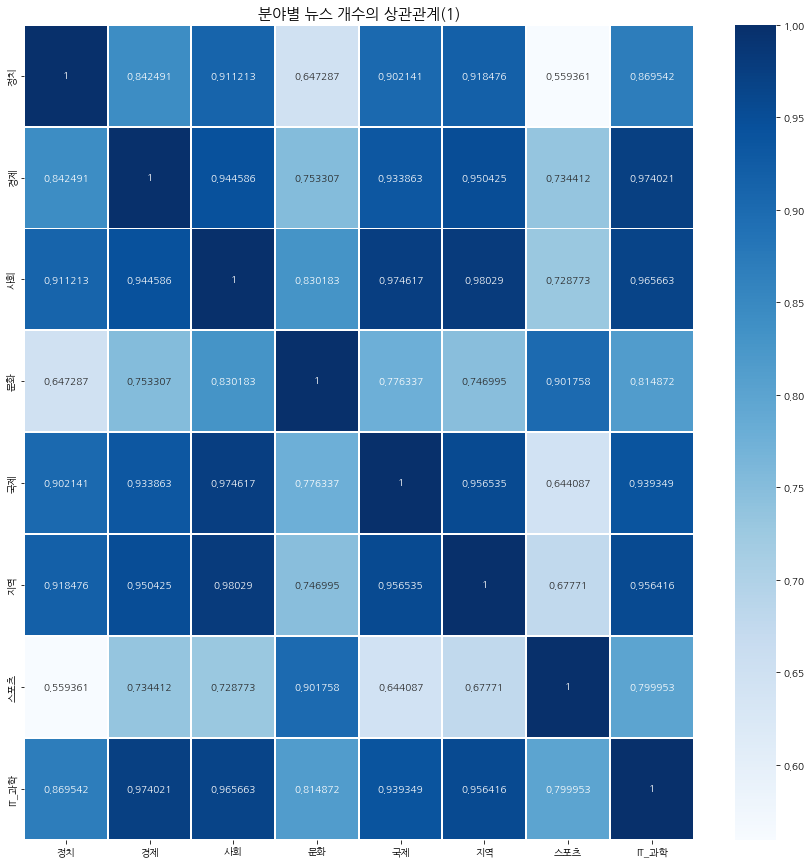

In [ ]:
# 범죄, 사고, 재해 분야를 제외한 뉴스 개수의 상관관계 히트맵

import seaborn as sns

fig = plt.figure(figsize=[15,15])
ax = sns.heatmap(news1.corr(),
                 annot=True, fmt='g',
                 linewidths = 1, 
                 linecolor = 'white',
                 cmap='Blues')

plt.title('분야별 뉴스 개수의 상관관계(1)', size = 15)

대부분의 상관관계가 양의 상관관계를 가졌으나 (스포츠, 정치), (스포츠, 국제), (정치, 문화) 등 일부는 상대적으로 낮은 상관관계를 가진 것으로 볼 수 잇습니다

Text(0.5, 1.0, '분야별 뉴스 개수의 상관관계(2)')

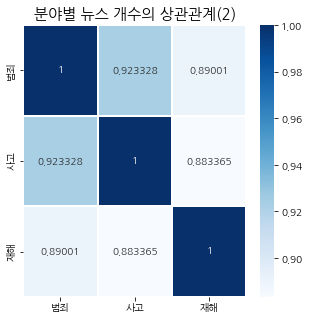

In [ ]:
# 범죄, 사고, 재해 분야 뉴스 개수의 상관관계 히트맵

fig = plt.figure(figsize=[5,5])
ax = sns.heatmap(news2.corr(),
                 annot=True, fmt='g',
                 linewidths = 1, 
                 linecolor = 'white',
                 cmap='Blues')

plt.title('분야별 뉴스 개수의 상관관계(2)', size = 15)

모든 상관관계가 1에 가까운 강한 양의 상관관계를 가지는 것을 찾아볼 수 있습니다.

# **3. 주요 이슈 및 사건**

종합주가지수에 영향을 미칠만한 주요 사건들을 5가지 주제로 나눈 후 주제별 임의로 선정하여\
그 기간 동안을 비롯해 사건 전, 후 종합주가지수의 변화를 비교 분석 해보았습니다\. 



## 1) 대한민국 선거



대통령선거, 국회의원 총선거, 지방선거일 기준으로 한 달 전후의 주가를 시각화해 선거가 주가에 영향을 미치는지 알아보았습니다. 

앞으로 등장하는 그래프들의 가로축의 중심은 선거일 입니다.

### (1) 대통령 선거

### 종합주가지수 종가와의 관계



In [ ]:
# 선거 전후 한 달 범위 설정

kospi_pre_elec13 = kospi[kospi['Date'].between('1987-11-16', '1988-01-16')]
kospi_pre_elec14 = kospi[kospi['Date'].between('1992-11-18', '1993-01-18')]
kospi_pre_elec15 = kospi[kospi['Date'].between('1997-11-18', '1998-01-18')]
kospi_pre_elec16 = kospi[kospi['Date'].between('2002-11-19', '2003-01-19')]
kospi_pre_elec17 = kospi[kospi['Date'].between('2007-11-19', '2008-01-19')]
kospi_pre_elec18 = kospi[kospi['Date'].between('2012-11-19', '2013-01-19')]
kospi_pre_elec19 = kospi[kospi['Date'].between('2017-04-09', '2017-06-09')]
kospi_pre_elec20 = kospi[kospi['Date'].between('2022-02-09', '2022-04-09')]

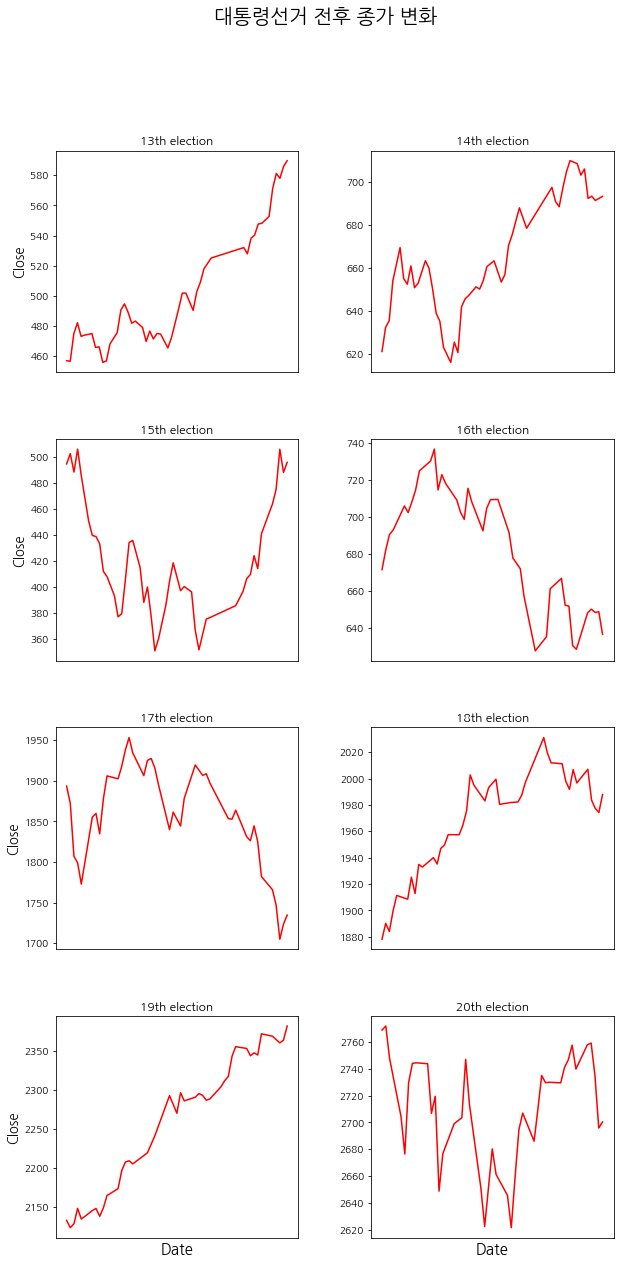

In [ ]:
f, axes = plt.subplots(4, 2)
f.set_size_inches((10, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

f.suptitle('대통령선거 전후 종가 변화', fontsize = 20)

axes[0, 0].plot(kospi_pre_elec13['Date'], kospi_pre_elec13['Close'], color='red')
axes[0, 0].set_title('13th election', fontsize = 12)
axes[0, 0].set_ylabel('Close', fontsize = 13)
axes[0, 0].set_xticks([])

axes[0, 1].plot(kospi_pre_elec14['Date'], kospi_pre_elec14['Close'], color='red')
axes[0, 1].set_title('14th election', fontsize = 12)
axes[0, 1].set_xticks([])

axes[1, 0].plot(kospi_pre_elec15['Date'], kospi_pre_elec15['Close'], color='red')
axes[1, 0].set_title('15th election', fontsize = 12)
axes[1, 0].set_ylabel('Close', fontsize = 13)
axes[1, 0].set_xticks([])

axes[1, 1].plot(kospi_pre_elec16['Date'], kospi_pre_elec16['Close'], color='red')
axes[1, 1].set_title('16th election', fontsize = 12)
axes[1, 1].set_xticks([])

axes[2, 0].plot(kospi_pre_elec17['Date'], kospi_pre_elec17['Close'], color='red')
axes[2, 0].set_title('17th election', fontsize = 12)
axes[2, 0].set_ylabel('Close', fontsize = 13)
axes[2, 0].set_xticks([])

axes[2, 1].plot(kospi_pre_elec18['Date'], kospi_pre_elec18['Close'], color='red')
axes[2, 1].set_title('18th election', fontsize = 12)
axes[2, 1].set_xticks([])


axes[3, 0].plot(kospi_pre_elec19['Date'], kospi_pre_elec19['Close'], color='red')
axes[3, 0].set_title('19th election', fontsize = 12)
axes[3, 0].set_ylabel('Close', fontsize = 13)
axes[3, 0].set_xlabel('Date', fontsize = 15)
axes[3, 0].set_xticks([])

axes[3, 1].plot(kospi_pre_elec20['Date'], kospi_pre_elec20['Close'], color='red')
axes[3, 1].set_title('20th election', fontsize = 12)
axes[3, 1].set_xlabel('Date', fontsize = 15)
axes[3, 1].set_xticks([])

plt.show()

총 8번의 대선 중 6번의 대선이 대선 전과 후를 비교하였을 때 주가가 상승함을 찾아볼 수 있었습니다.

### 종합주가지수 거래량과의 관계

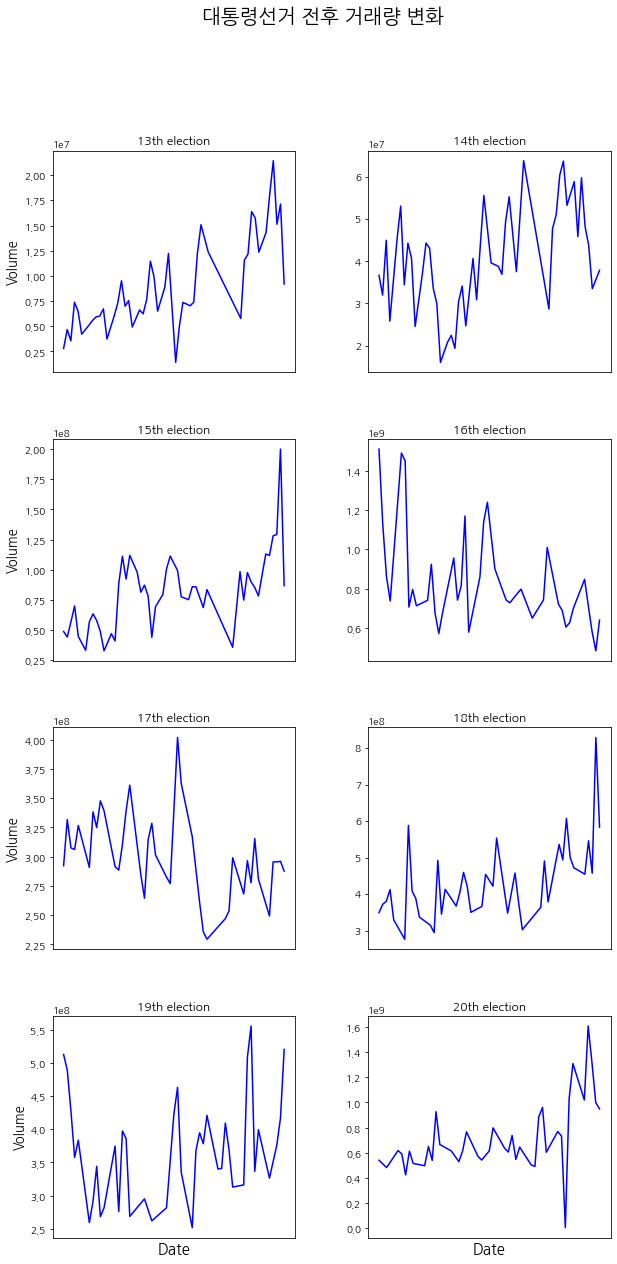

In [ ]:
f, axes = plt.subplots(4, 2)
f.set_size_inches((10, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

f.suptitle('대통령선거 전후 거래량 변화', fontsize = 20)

axes[0, 0].plot(kospi_pre_elec13['Date'], kospi_pre_elec13['Volume'], color='blue')
axes[0, 0].set_title('13th election', fontsize = 12)
axes[0, 0].set_ylabel('Volume', fontsize = 13)
axes[0, 0].set_xticks([])

axes[0, 1].plot(kospi_pre_elec14['Date'], kospi_pre_elec14['Volume'], color='blue')
axes[0, 1].set_title('14th election', fontsize = 12)
axes[0, 1].set_xticks([])

axes[1, 0].plot(kospi_pre_elec15['Date'], kospi_pre_elec15['Volume'], color='blue')
axes[1, 0].set_title('15th election', fontsize = 12)
axes[1, 0].set_ylabel('Volume', fontsize = 13)
axes[1, 0].set_xticks([])

axes[1, 1].plot(kospi_pre_elec16['Date'], kospi_pre_elec16['Volume'], color='blue')
axes[1, 1].set_title('16th election', fontsize = 12)
axes[1, 1].set_xticks([])

axes[2, 0].plot(kospi_pre_elec17['Date'], kospi_pre_elec17['Volume'], color='blue')
axes[2, 0].set_title('17th election', fontsize = 12)
axes[2, 0].set_ylabel('Volume', fontsize = 13)
axes[2, 0].set_xticks([])

axes[2, 1].plot(kospi_pre_elec18['Date'], kospi_pre_elec18['Volume'], color='blue')
axes[2, 1].set_title('18th election', fontsize = 12)
axes[2, 1].set_xticks([])


axes[3, 0].plot(kospi_pre_elec19['Date'], kospi_pre_elec19['Volume'], color='blue')
axes[3, 0].set_title('19th election', fontsize = 12)
axes[3, 0].set_ylabel('Volume', fontsize = 13)
axes[3, 0].set_xlabel('Date', fontsize = 15)
axes[3, 0].set_xticks([])

axes[3, 1].plot(kospi_pre_elec20['Date'], kospi_pre_elec20['Volume'], color='blue')
axes[3, 1].set_title('20th election', fontsize = 12)
axes[3, 1].set_xlabel('Date', fontsize = 15)
axes[3, 1].set_xticks([])

plt.show()

총 8번의 대선 중 4번의 대선이 대선 전과 후를 비교하였을 때 거래량이 상승함을 찾아볼 수 있었습니다.

## (2) 국회의원 총선

### 종합주가지수 종가와의 관계

In [ ]:
# 선거 전후 한 달 범위 설정

kospi_mna_elec12 = kospi[kospi['Date'].between('1985-02-25', '1985-04-25')]
kospi_mna_elec13 = kospi[kospi['Date'].between('1988-03-26', '1988-05-26')]
kospi_mna_elec14 = kospi[kospi['Date'].between('1992-02-24', '1992-04-24')]
kospi_mna_elec15 = kospi[kospi['Date'].between('1996-03-11', '1996-05-11')]
kospi_mna_elec16 = kospi[kospi['Date'].between('2000-03-13', '2000-05-13')]
kospi_mna_elec17 = kospi[kospi['Date'].between('2004-03-15', '2004-05-15')]
kospi_mna_elec18 = kospi[kospi['Date'].between('2008-03-09', '2008-05-09')]
kospi_mna_elec19 = kospi[kospi['Date'].between('2012-03-11', '2012-05-11')]
kospi_mna_elec20 = kospi[kospi['Date'].between('2016-03-13', '2016-05-13')]
kospi_mna_elec21 = kospi[kospi['Date'].between('2020-03-15', '2020-05-15')]

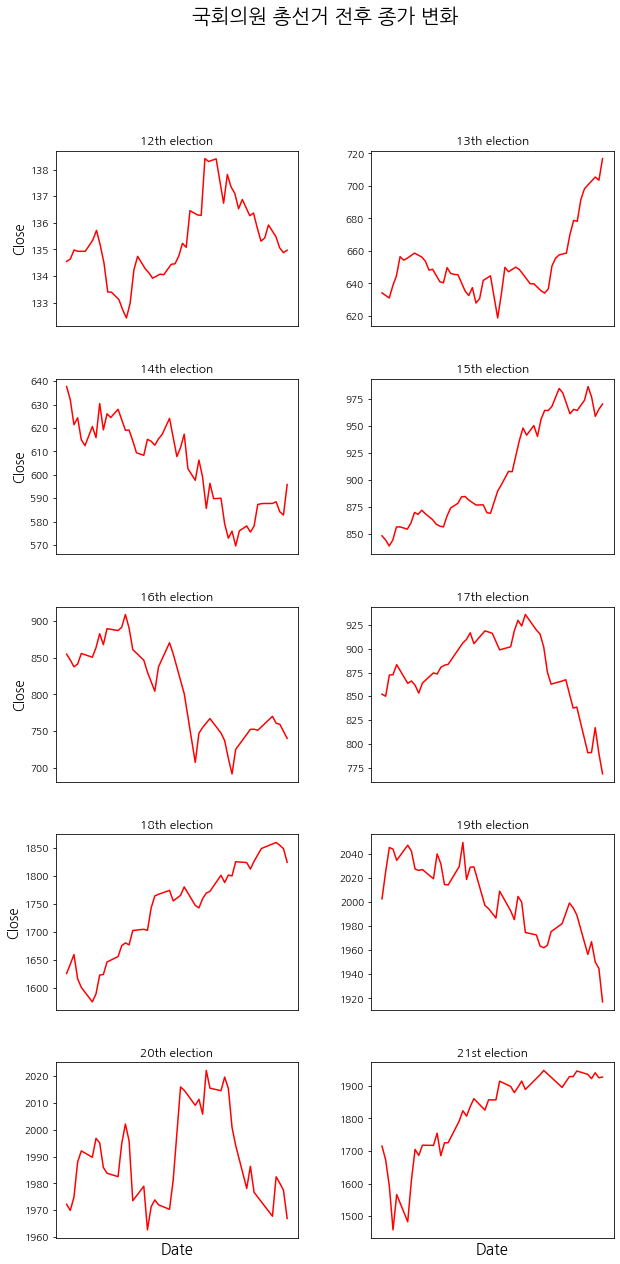

In [ ]:
f, axes = plt.subplots(5, 2)
f.set_size_inches((10, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

f.suptitle('국회의원 총선거 전후 종가 변화', fontsize = 20)

axes[0, 0].plot(kospi_mna_elec12['Date'], kospi_mna_elec12['Close'], color='red')
axes[0, 0].set_title('12th election', fontsize = 12)
axes[0, 0].set_ylabel('Close', fontsize = 13)
axes[0, 0].set_xticks([])

axes[0, 1].plot(kospi_mna_elec13['Date'], kospi_mna_elec13['Close'], color='red')
axes[0, 1].set_title('13th election', fontsize = 12)
axes[0, 1].set_xticks([])

axes[1, 0].plot(kospi_mna_elec14['Date'], kospi_mna_elec14['Close'], color='red')
axes[1, 0].set_title('14th election', fontsize = 12)
axes[1, 0].set_ylabel('Close', fontsize = 13)
axes[1, 0].set_xticks([])

axes[1, 1].plot(kospi_mna_elec15['Date'], kospi_mna_elec15['Close'], color='red')
axes[1, 1].set_title('15th election', fontsize = 12)
axes[1, 1].set_xticks([])

axes[2, 0].plot(kospi_mna_elec16['Date'], kospi_mna_elec16['Close'], color='red')
axes[2, 0].set_title('16th election', fontsize = 12)
axes[2, 0].set_ylabel('Close', fontsize = 13)
axes[2, 0].set_xticks([])

axes[2, 1].plot(kospi_mna_elec17['Date'], kospi_mna_elec17['Close'], color='red')
axes[2, 1].set_title('17th election', fontsize = 12)
axes[2, 1].set_xticks([])


axes[3, 0].plot(kospi_mna_elec18['Date'], kospi_mna_elec18['Close'], color='red')
axes[3, 0].set_title('18th election', fontsize = 12)
axes[3, 0].set_ylabel('Close', fontsize = 13)
axes[3, 0].set_xticks([])

axes[3, 1].plot(kospi_mna_elec19['Date'], kospi_mna_elec19['Close'], color='red')
axes[3, 1].set_title('19th election', fontsize = 12)
axes[3, 1].set_xticks([])

axes[4, 0].plot(kospi_mna_elec20['Date'], kospi_mna_elec20['Close'], color='red')
axes[4, 0].set_title('20th election', fontsize = 12)
axes[4, 0].set_xlabel('Date', fontsize = 15)
axes[4, 0].set_xticks([])

axes[4, 1].plot(kospi_mna_elec21['Date'], kospi_mna_elec21['Close'], color='red')
axes[4, 1].set_title('21st election', fontsize = 12)
axes[4, 1].set_xlabel('Date', fontsize = 15)
axes[4, 1].set_xticks([])

plt.show()

총 10번의 국회의원 총선 중 7번의 선거가 선거 전과 후를 비교하였을 때 주가가 상승함을 찾아볼 수 있었습니다.

### 종합주가지수 거래량과의 관계

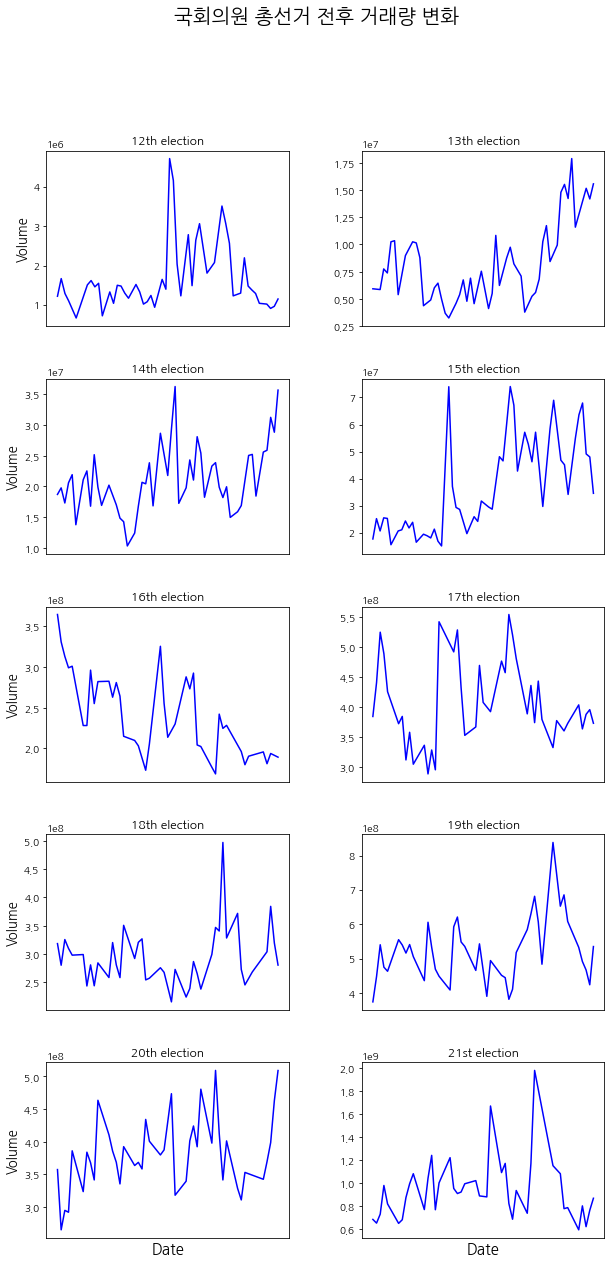

In [ ]:
f, axes = plt.subplots(5, 2)
f.set_size_inches((10, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

f.suptitle('국회의원 총선거 전후 거래량 변화', fontsize = 20)

axes[0, 0].plot(kospi_mna_elec12['Date'], kospi_mna_elec12['Volume'], color='blue')
axes[0, 0].set_title('12th election', fontsize = 12)
axes[0, 0].set_ylabel('Volume', fontsize = 13)
axes[0, 0].set_xticks([])

axes[0, 1].plot(kospi_mna_elec13['Date'], kospi_mna_elec13['Volume'], color='blue')
axes[0, 1].set_title('13th election', fontsize = 12)
axes[0, 1].set_xticks([])

axes[1, 0].plot(kospi_mna_elec14['Date'], kospi_mna_elec14['Volume'], color='blue')
axes[1, 0].set_title('14th election', fontsize = 12)
axes[1, 0].set_ylabel('Volume', fontsize = 13)
axes[1, 0].set_xticks([])

axes[1, 1].plot(kospi_mna_elec15['Date'], kospi_mna_elec15['Volume'], color='blue')
axes[1, 1].set_title('15th election', fontsize = 12)
axes[1, 1].set_xticks([])

axes[2, 0].plot(kospi_mna_elec16['Date'], kospi_mna_elec16['Volume'], color='blue')
axes[2, 0].set_title('16th election', fontsize = 12)
axes[2, 0].set_ylabel('Volume', fontsize = 13)
axes[2, 0].set_xticks([])

axes[2, 1].plot(kospi_mna_elec17['Date'], kospi_mna_elec17['Volume'], color='blue')
axes[2, 1].set_title('17th election', fontsize = 12)
axes[2, 1].set_xticks([])


axes[3, 0].plot(kospi_mna_elec18['Date'], kospi_mna_elec18['Volume'], color='blue')
axes[3, 0].set_title('18th election', fontsize = 12)
axes[3, 0].set_ylabel('Volume', fontsize = 13)
axes[3, 0].set_xticks([])

axes[3, 1].plot(kospi_mna_elec19['Date'], kospi_mna_elec19['Volume'], color='blue')
axes[3, 1].set_title('19th election', fontsize = 12)
axes[3, 1].set_xticks([])

axes[4, 0].plot(kospi_mna_elec20['Date'], kospi_mna_elec20['Volume'], color='blue')
axes[4, 0].set_title('20th election', fontsize = 12)
axes[4, 0].set_ylabel('Volume', fontsize = 13)
axes[4, 0].set_xlabel('Date', fontsize = 15)
axes[4, 0].set_xticks([])

axes[4, 1].plot(kospi_mna_elec21['Date'], kospi_mna_elec21['Volume'], color='blue')
axes[4, 1].set_title('21st election', fontsize = 12)
axes[4, 1].set_xlabel('Date', fontsize = 15)
axes[4, 1].set_xticks([])

plt.show()

총 10번의 국회의원 총선 중 6번의 선거가 선거 전과 후를 비교하였을 때 거래량이 상승함을 찾아볼 수 있었습니다.

## (3) 전국동시지방선거

###종합주가지수 종가와의 관계

In [ ]:
# 선거 전후 한 달 범위 설정

kospi_pro_elec1 = kospi[kospi['Date'].between('1995-05-27', '1995-07-27')]
kospi_pro_elec2 = kospi[kospi['Date'].between('1998-05-04', '1998-07-04')]
kospi_pro_elec3 = kospi[kospi['Date'].between('2002-05-13', '2002-07-13')]
kospi_pro_elec4 = kospi[kospi['Date'].between('2006-04-30', '2006-06-30')]
kospi_pro_elec5 = kospi[kospi['Date'].between('2010-05-02', '2010-07-02')]
kospi_pro_elec6 = kospi[kospi['Date'].between('2014-05-04', '2014-07-04')]
kospi_pro_elec7 = kospi[kospi['Date'].between('2018-05-13', '2018-07-13')]
kospi_pro_elec8 = kospi[kospi['Date'].between('2022-05-01', '2022-07-01')]

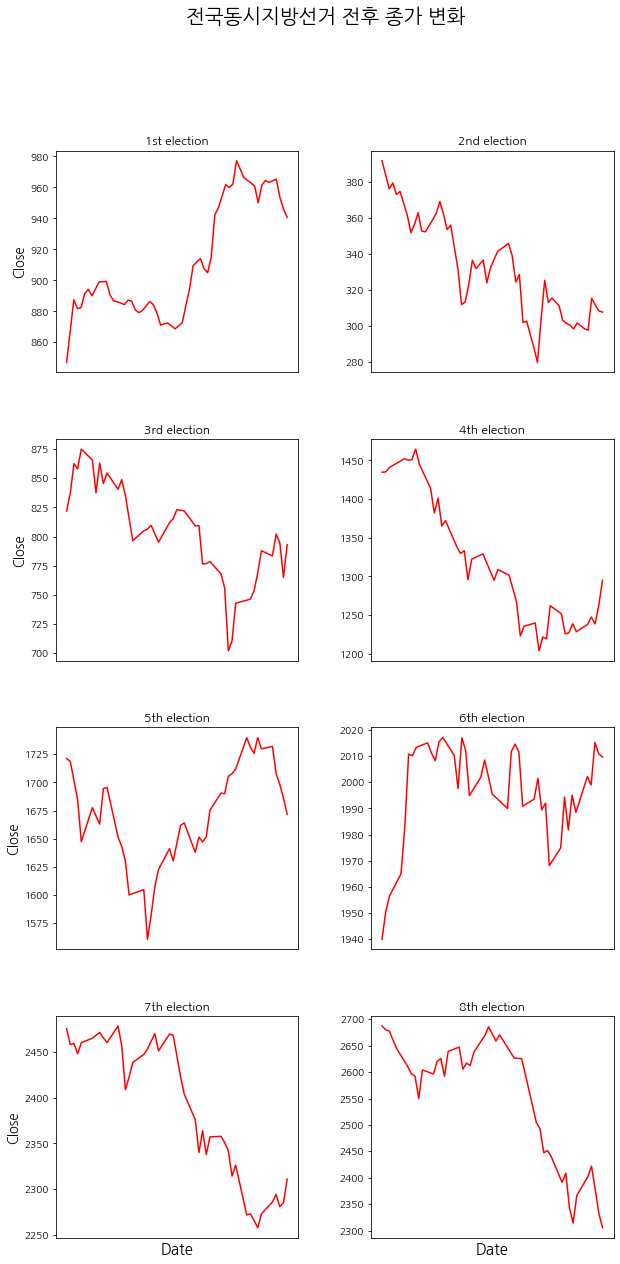

In [ ]:
f, axes = plt.subplots(4, 2)
f.set_size_inches((10, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

f.suptitle('전국동시지방선거 전후 종가 변화', fontsize = 20)

axes[0, 0].plot(kospi_pro_elec1['Date'], kospi_pro_elec1['Close'], color='red')
axes[0, 0].set_title('1st election', fontsize = 12)
axes[0, 0].set_ylabel('Close', fontsize = 13)
axes[0, 0].set_xticks([])

axes[0, 1].plot(kospi_pro_elec2['Date'], kospi_pro_elec2['Close'], color='red')
axes[0, 1].set_title('2nd election', fontsize = 12)
axes[0, 1].set_xticks([])

axes[1, 0].plot(kospi_pro_elec3['Date'], kospi_pro_elec3['Close'], color='red')
axes[1, 0].set_title('3rd election', fontsize = 12)
axes[1, 0].set_ylabel('Close', fontsize = 13)
axes[1, 0].set_xticks([])

axes[1, 1].plot(kospi_pro_elec4['Date'], kospi_pro_elec4['Close'], color='red')
axes[1, 1].set_title('4th election', fontsize = 12)
axes[1, 1].set_xticks([])

axes[2, 0].plot(kospi_pro_elec5['Date'], kospi_pro_elec5['Close'], color='red')
axes[2, 0].set_title('5th election', fontsize = 12)
axes[2, 0].set_ylabel('Close', fontsize = 13)
axes[2, 0].set_xticks([])

axes[2, 1].plot(kospi_pro_elec6['Date'], kospi_pro_elec6['Close'], color='red')
axes[2, 1].set_title('6th election', fontsize = 12)
axes[2, 1].set_xticks([])


axes[3, 0].plot(kospi_pro_elec7['Date'], kospi_pro_elec7['Close'], color='red')
axes[3, 0].set_title('7th election', fontsize = 12)
axes[3, 0].set_ylabel('Close', fontsize = 13)
axes[3, 0].set_xlabel('Date', fontsize = 15)
axes[3, 0].set_xticks([])

axes[3, 1].plot(kospi_pro_elec8['Date'], kospi_pro_elec8['Close'], color='red')
axes[3, 1].set_title('8th election', fontsize = 12)
axes[3, 1].set_xlabel('Date', fontsize = 15)
axes[3, 1].set_xticks([])

plt.show()

총 8번의 전국동시지방선거 중 2번의 선거뿐만이 대선 전과 후를 비교하였을 때 주가가 상승함을 찾아볼 수 있었습니다.

### 종합주가지수 거래량과의 관계

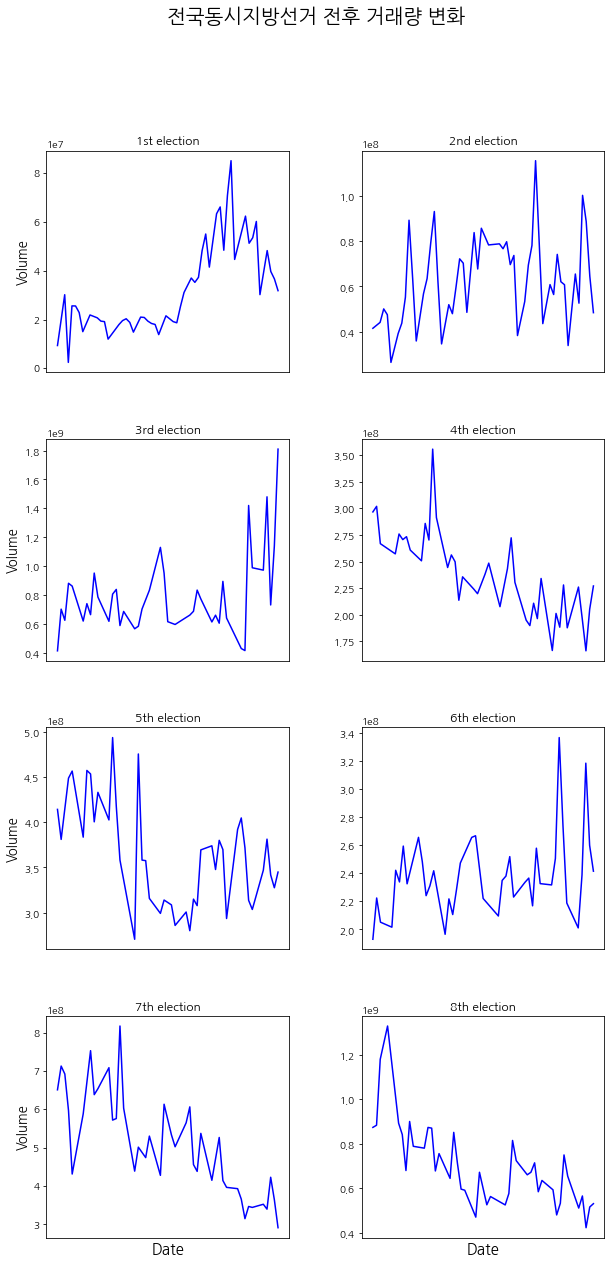

In [ ]:
f, axes = plt.subplots(4, 2)
f.set_size_inches((10, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

f.suptitle('전국동시지방선거 전후 거래량 변화', fontsize = 20)

axes[0, 0].plot(kospi_pro_elec1['Date'], kospi_pro_elec1['Volume'], color='blue')
axes[0, 0].set_title('1st election', fontsize = 12)
axes[0, 0].set_ylabel('Volume', fontsize = 13)
axes[0, 0].set_xticks([])

axes[0, 1].plot(kospi_pro_elec2['Date'], kospi_pro_elec2['Volume'], color='blue')
axes[0, 1].set_title('2nd election', fontsize = 12)
axes[0, 1].set_xticks([])

axes[1, 0].plot(kospi_pro_elec3['Date'], kospi_pro_elec3['Volume'], color='blue')
axes[1, 0].set_title('3rd election', fontsize = 12)
axes[1, 0].set_ylabel('Volume', fontsize = 13)
axes[1, 0].set_xticks([])

axes[1, 1].plot(kospi_pro_elec4['Date'], kospi_pro_elec4['Volume'], color='blue')
axes[1, 1].set_title('4th election', fontsize = 12)
axes[1, 1].set_xticks([])

axes[2, 0].plot(kospi_pro_elec5['Date'], kospi_pro_elec5['Volume'], color='blue')
axes[2, 0].set_title('5th election', fontsize = 12)
axes[2, 0].set_ylabel('Volume', fontsize = 13)
axes[2, 0].set_xticks([])

axes[2, 1].plot(kospi_pro_elec6['Date'], kospi_pro_elec6['Volume'], color='blue')
axes[2, 1].set_title('6th election', fontsize = 12)
axes[2, 1].set_xticks([])


axes[3, 0].plot(kospi_pro_elec7['Date'], kospi_pro_elec7['Volume'], color='blue')
axes[3, 0].set_title('7th election', fontsize = 12)
axes[3, 0].set_ylabel('Volume', fontsize = 13)
axes[3, 0].set_xlabel('Date', fontsize = 15)
axes[3, 0].set_xticks([])

axes[3, 1].plot(kospi_pro_elec8['Date'], kospi_pro_elec8['Volume'], color='blue')
axes[3, 1].set_title('8th election', fontsize = 12)
axes[3, 1].set_xlabel('Date', fontsize = 15)
axes[3, 1].set_xticks([])

plt.show()

총 8번의 전국동시지방선거 중 ???번의 선거가 대선 전과 후를 비교하였을 때 거래량이 상승함을 찾아볼 수 있었습니다.

## 2) 국제 스포츠 대회

국내에서 벌어진 국제 스포츠 대회가 종합주가지수에 미치는 영향을 알아보기 위해\
동계올림픽, 하계올림픽 그리고 월드컵 시기를 기준으로 분석해보았습니다.

In [ ]:
!pip install finance-datareader #데이터로드를 위한 라이브러리 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr
import pandas_datareader as pdr

In [ ]:
# 1988년 서울 올림픽 - 1988년 9월 17일 ~ 10월 2일 
# 2002년 한일 월드컵 - 2002년 5월 31일 ~ 2002년 6월 30일
# 2018년 평창 동계 올림픽 - 2018년 2월 9일 ~ 2월 25일

# 앞 뒤로 두 달 씩 해당 월 부분 데이터 추출

kospi_88 = fdr.DataReader('KS11', start='1988-07-01', end='1988-11-30')
kospi_02 = fdr.DataReader('KS11', start='2002-03-01', end='2002-08-31')
kospi_18 = fdr.DataReader('KS11', start='2017-12-01', end='2018-04-30')

### 종합주가지수 종가와의 관계

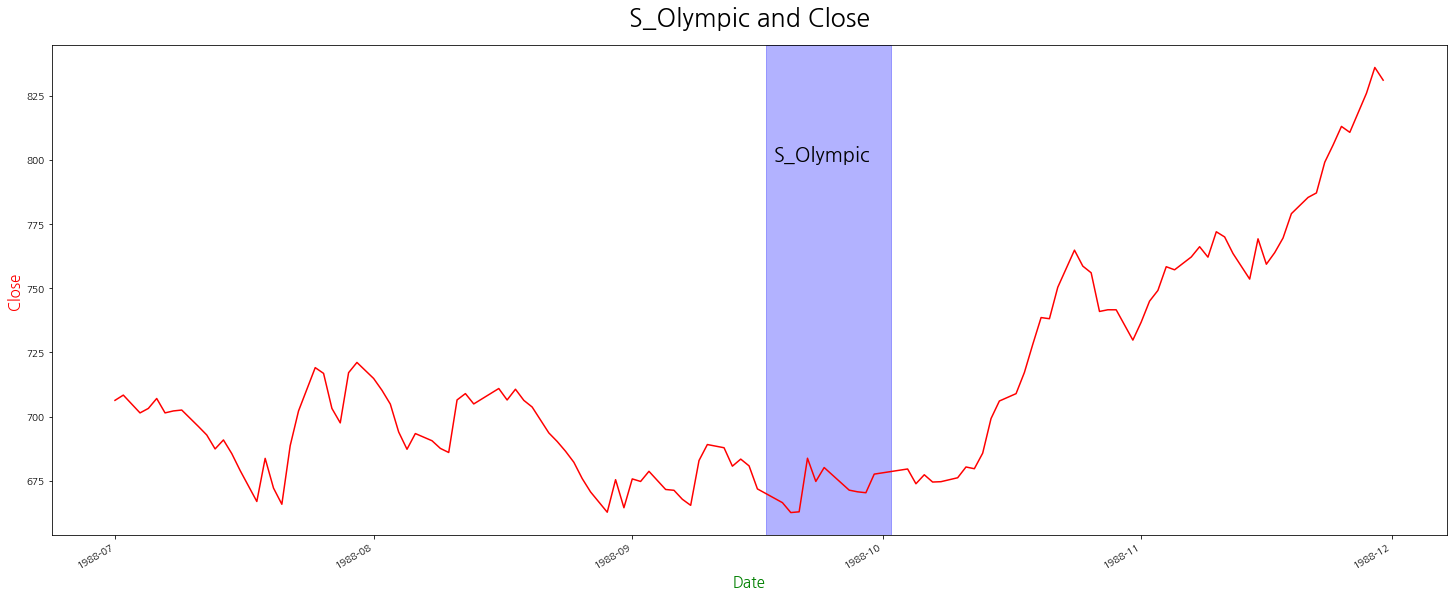

In [ ]:
# 88 서울올림픽

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_88['Close'].plot(color = 'red')
graph.axvspan('1988-09-17', '1988-10-02', color='blue', alpha=0.3)
graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')
graph.annotate('S_Olympic', xy=('1988-09-18' ,800), fontsize=20)

plt.title('S_Olympic and Close',fontsize=25, pad = 20) 

fig.tight_layout()

plt.show()

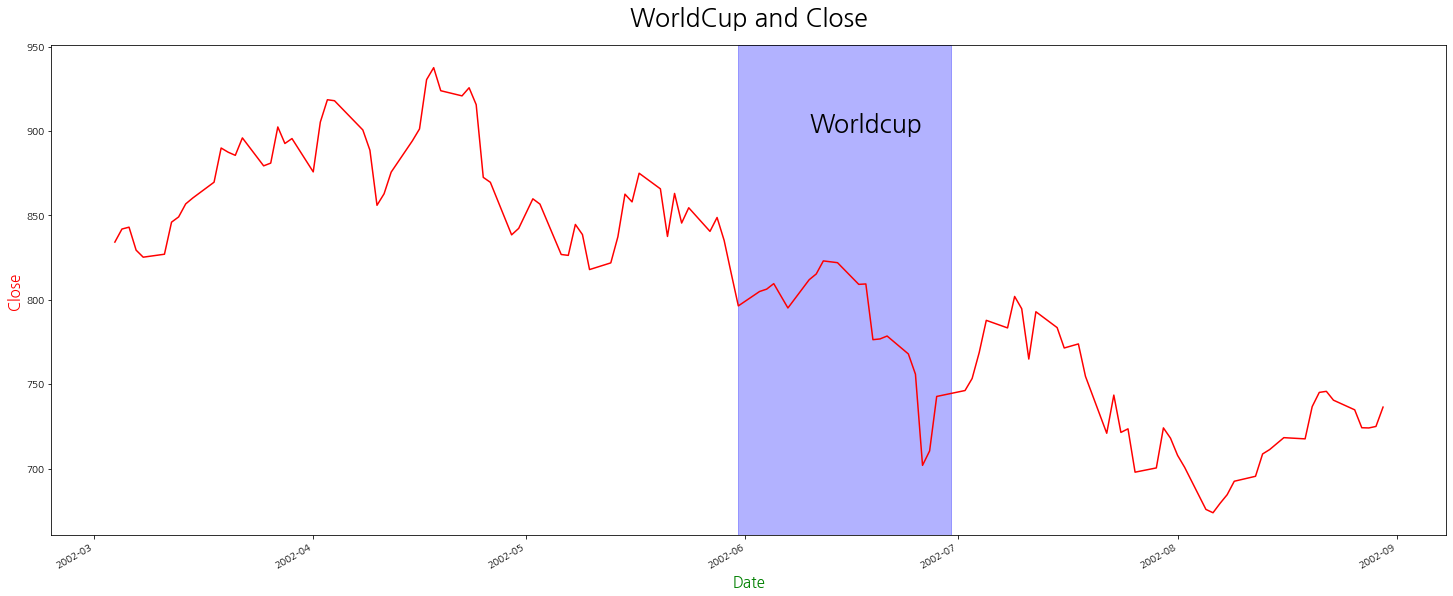

In [ ]:
# 02 한일월드컵

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_02['Close'].plot(color = 'red')
graph.axvspan('2002-05-31', '2002-06-30', color='blue', alpha=0.3)
graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')
graph.annotate('Worldcup', xy=('2002-06-10' ,900), fontsize=25)

plt.title('WorldCup and Close',fontsize=25, pad = 20) 

fig.tight_layout()

plt.show()

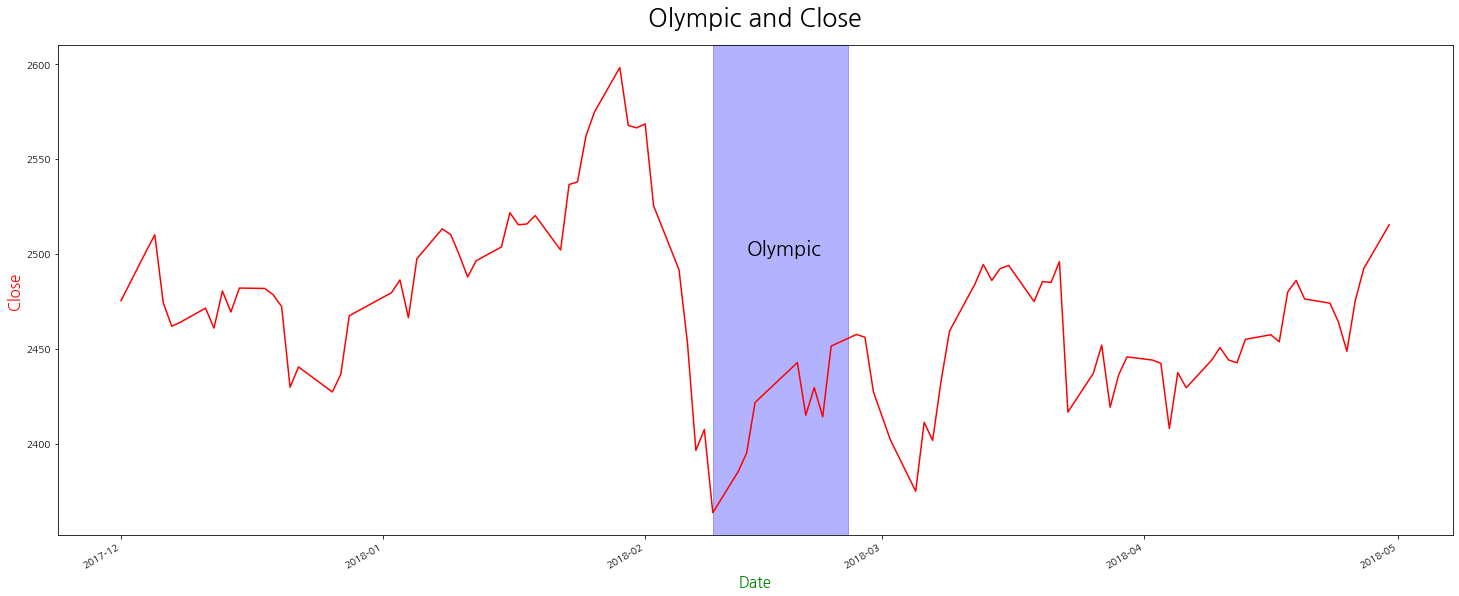

In [ ]:
# 18 평창 동계올림픽

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_18['Close'].plot(color = 'red')
graph.axvspan('2018-02-09', '2018-02-25', color='blue', alpha=0.3)
graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')
graph.annotate('Olympic', xy=('2018-02-13' ,2500), fontsize=20)

plt.title('Olympic and Close',fontsize=25, pad = 20) 

fig.tight_layout()
plt.show()

88 서울올림픽의 경우 익히 알려진 것 처럼 올림픽 직후 종합주가지수가 크게 증가하는 추세를 보였고\
반대로 02 한일월드컵의 경우 오히려 월드컵 직후 종합주가지수가 하락하는 경향이 보입니다\.
18 동계올림픽은 올림픽 기간에만 종합주가지수가 감소하고 올림픽 전후로는 큰 차이가 없어 보입니다\.


위 3가지 경우를 토대로 봤을 때 국내에서 개최된 국제 스포츠가 종합주가지수에 유의미한 영향을 미치지만
다른 외부 요소들과 환경에 의해 그 방향이 정해진다고 볼 수 있습니다.

###종합주가지수 거래량과의 관계

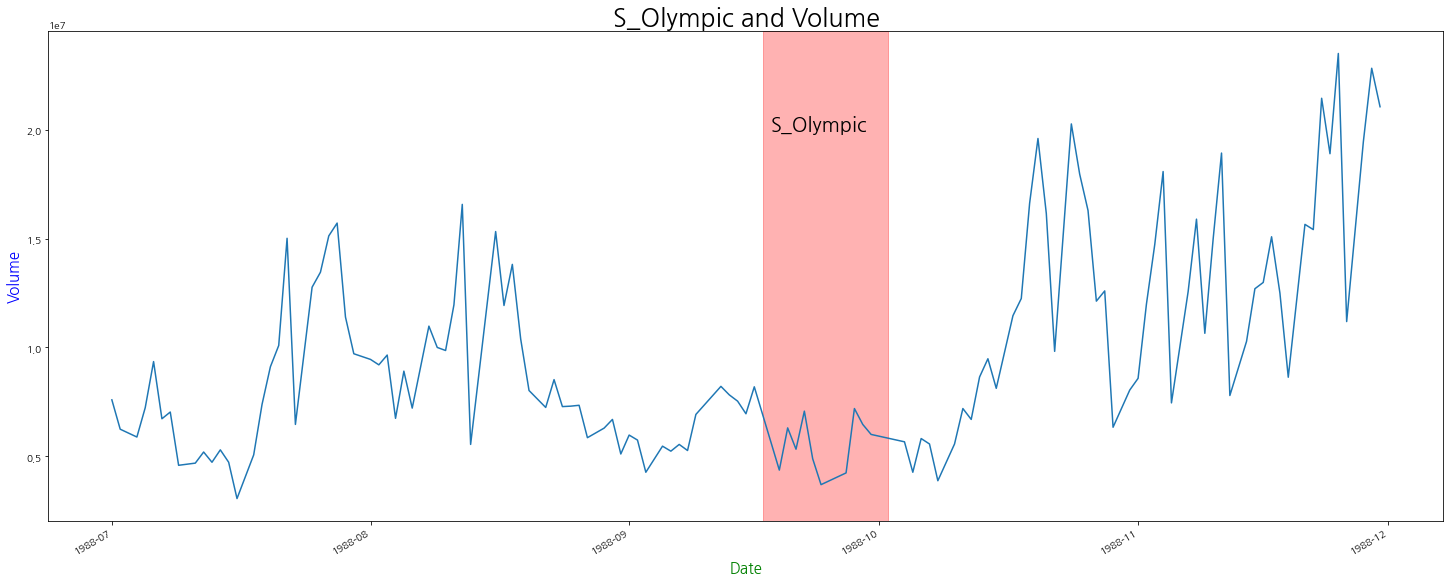

In [ ]:
# 88 서울올림픽

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_88['Volume'].plot()
graph.axvspan('1988-09-17', '1988-10-02', color='red', alpha=0.3)
graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')
graph.annotate('S_Olympic', xy=('1988-09-18' ,2e7), fontsize=20)

plt.title('S_Olympic and Volume',fontsize=25) 

fig.tight_layout()

plt.show()

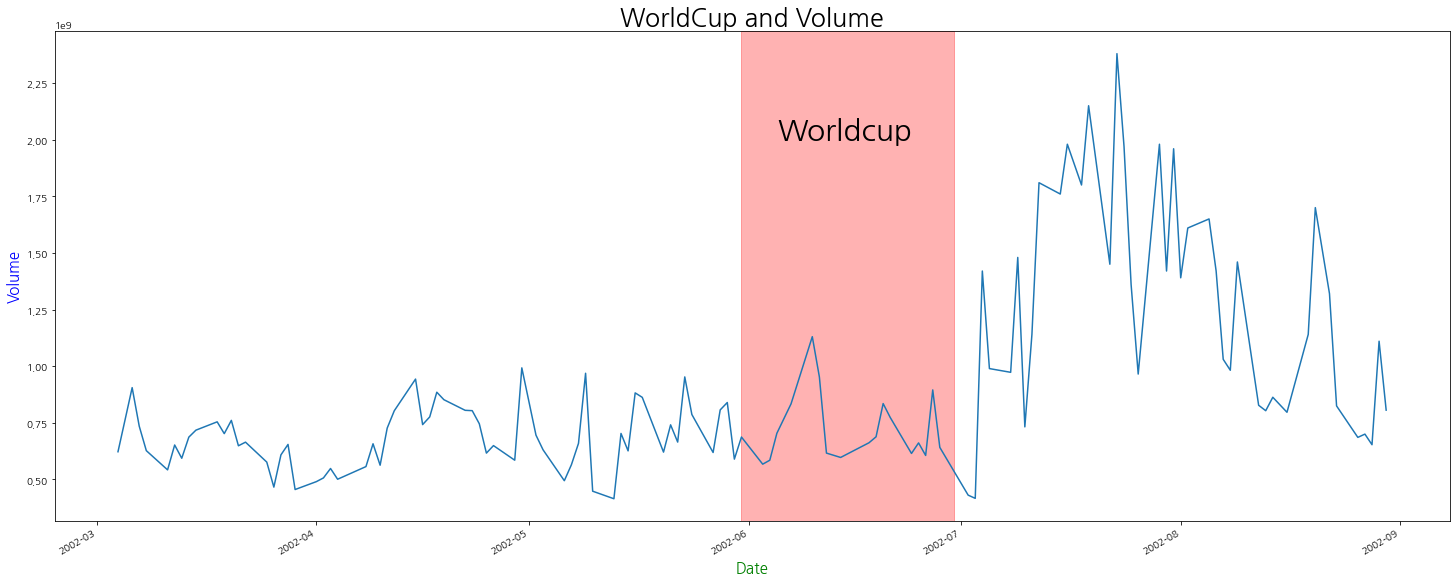

In [ ]:
# 02 한일월드컵

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_02['Volume'].plot()
graph.axvspan('2002-05-31', '2002-06-30', color='red', alpha=0.3)
graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')
graph.annotate('Worldcup', xy=('2002-06-05' ,2e9), fontsize=30)

plt.title('WorldCup and Volume',fontsize=25) 

fig.tight_layout()

plt.show()

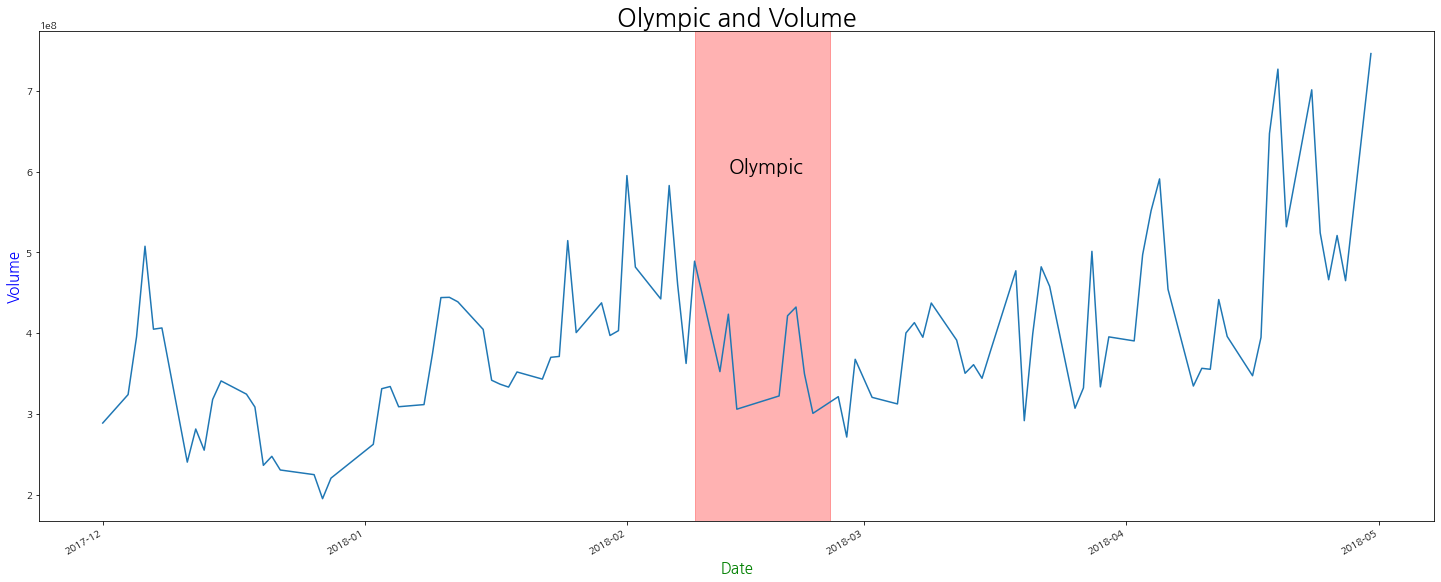

In [ ]:
# 18 평창 동계올림픽

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_18['Volume'].plot()
graph.axvspan('2018-02-09', '2018-02-25', color='red', alpha=0.3)
graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')
graph.annotate('Olympic', xy=('2018-02-13' ,6e8), fontsize=20)

plt.title('Olympic and Volume',fontsize=25) 

fig.tight_layout()
plt.show()

공통적으로 대회 기간 동안 종합주가지수의 거래량은 감소하는 경향을 보입니다\.

하지만 02년 한일월드컵 직후 보여주었던 거래량 상승(아마 가격의 하락으로 인한)을 제외하고는\
종합주가지수에 큰 영향을 미치는 것 같지는 않아 보입니다.

## 3) 경제 위기

경제위기가 종합주가지수에 미치는 영향을 알아보고자 합니다\.

선정한 경제위기는 IMF, 08 리만브라더스 사태, 코로나 팬대믹으로 나누었습니다.

### 종합주가지수 종가와의 관계

Text(0.5, 1.0, 'economic crisis and Close')

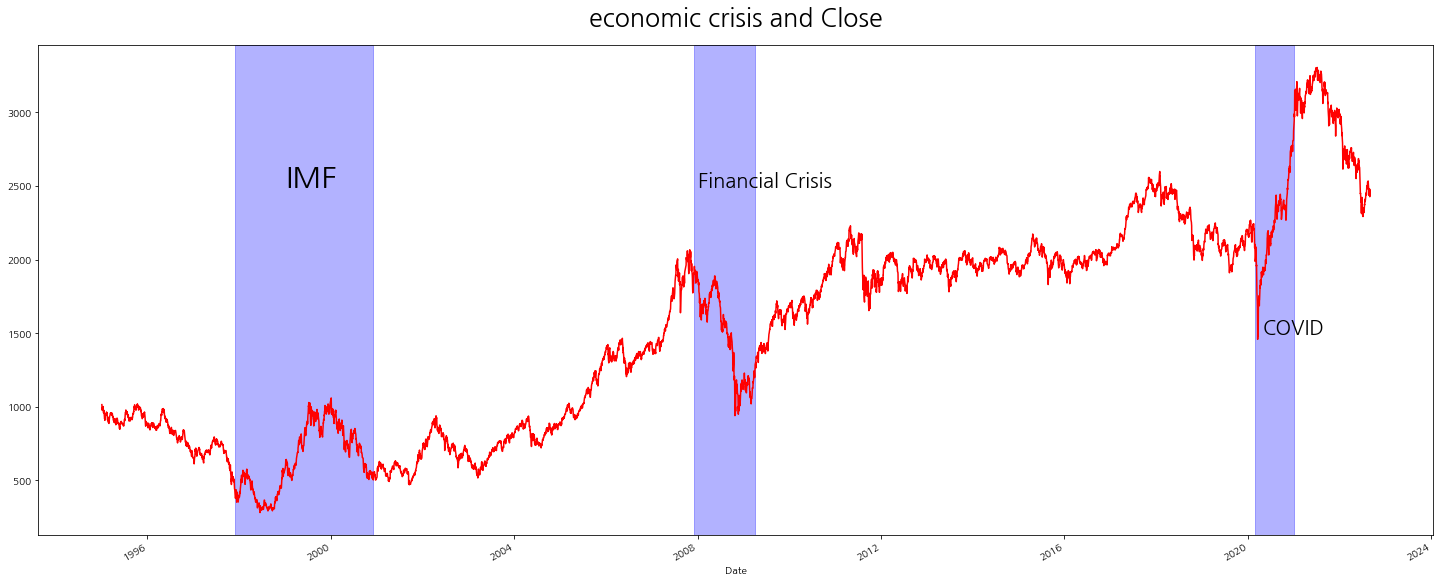

In [ ]:
#IMF 기간 
#1997년 12월 01일 ~ 2000년 11월 30일

#리만브라더스 사태
#2007년 12월 01일 ~ 2009년 1월 31일

#코로나 팬대믹 
#2020년 3월 01일 ~ 2020년 12월 31일

kospi_e = fdr.DataReader('KS11', start='1995-01-01', end='2022-08-31') #데이터로드

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 
graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')
graph= kospi_e['Close'].plot(color='red')
fig.tight_layout()

# IMF
graph.axvspan('1997-12-01', '2000-11-30', alpha=0.3, color='blue')
graph.annotate('IMF', xy=('1999', 2500), fontsize=30)

# 금융위기
graph.axvspan('2007-12-01', '2009-03-31', alpha=0.3, color='blue')
graph.annotate('Financial Crisis', xy=('2008', 2500), fontsize=20)

# 코로나
graph.axvspan('2020-03-01', '2020-12-31', alpha=0.3, color='blue')
graph.annotate('COVID', xy=('2020-05' ,1500), fontsize=20)

plt.title('economic crisis and Close',fontsize=25, pad = 20) 


알고 있던 것처럼 경제 위기 시작과 더불어 종합주가지수의 가격이 대폭 하락하였고\
경제 위기 극복과 더불어 안정세를 되찾는 것을 알 수 있습니다\.

(IMF를 제외한 명시 기간은 임의로 설정하였습니다.)

### 종합주가지수 거래량과의 관계

Text(0.5, 1.0, 'economic crisis and Volume')

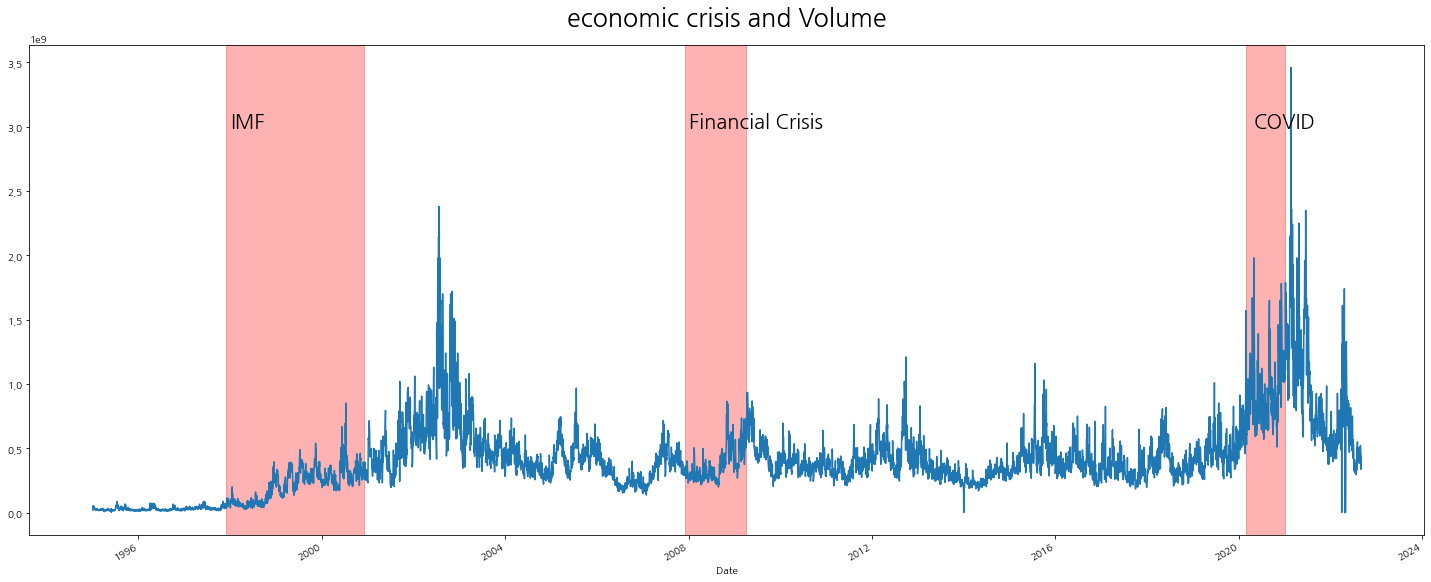

In [ ]:
plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 
graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')
graph= kospi_e['Volume'].plot()
fig.tight_layout()

# IMF
graph.axvspan('1997-12-01', '2000-11-30', alpha=0.3, color='red')
graph.annotate('IMF', xy=('1998', 3e9), fontsize=20)

# 금융위기
graph.axvspan('2007-12-01', '2009-03-31', alpha=0.3, color='red')
graph.annotate('Financial Crisis', xy=('2008', 3e9), fontsize=20)

# 코로나
graph.axvspan('2020-03-01', '2020-12-31', alpha=0.3, color='red')
graph.annotate('COVID', xy=('2020-05' ,3e9), fontsize=20)

plt.title('economic crisis and Volume',fontsize=25, pad = 20)

가격과는 다르게 거래량은 얼핏 보기에 큰 영향을 미쳤다고 볼 순 없습니다\.

하지만 코로나 팬대믹 시작 시기를 비롯해 거래량 증가를 보이는 몇몇 구간을 볼 수 있습니다.

##4) 국제 사건

국제 사건이 국내 종합주가지수에 미치는 영향을 알고자\
90년대에선 전쟁을, 00년대에서는 큰 테러를,  20년대에서는 정치사건을 선정해 분석해보았습니다.

In [ ]:
# 걸프전 : 1990년 8월 2일 ~ 1991년 2월 28일
# 911테러 : 2001년 9월 11일
# 브렉시트 : 2020년 1월 31일

#데이터로드 

kospi_w1 = fdr.DataReader('KS11', start='1988-08-01', end='1993-08-01')
kospi_w2 = fdr.DataReader('KS11', start='2001-03-01', end='2001-12-31')
kospi_w3 = fdr.DataReader('KS11', start='2019-08-01', end='2020-07-31')

### 종합주가지수 종가와의 관계

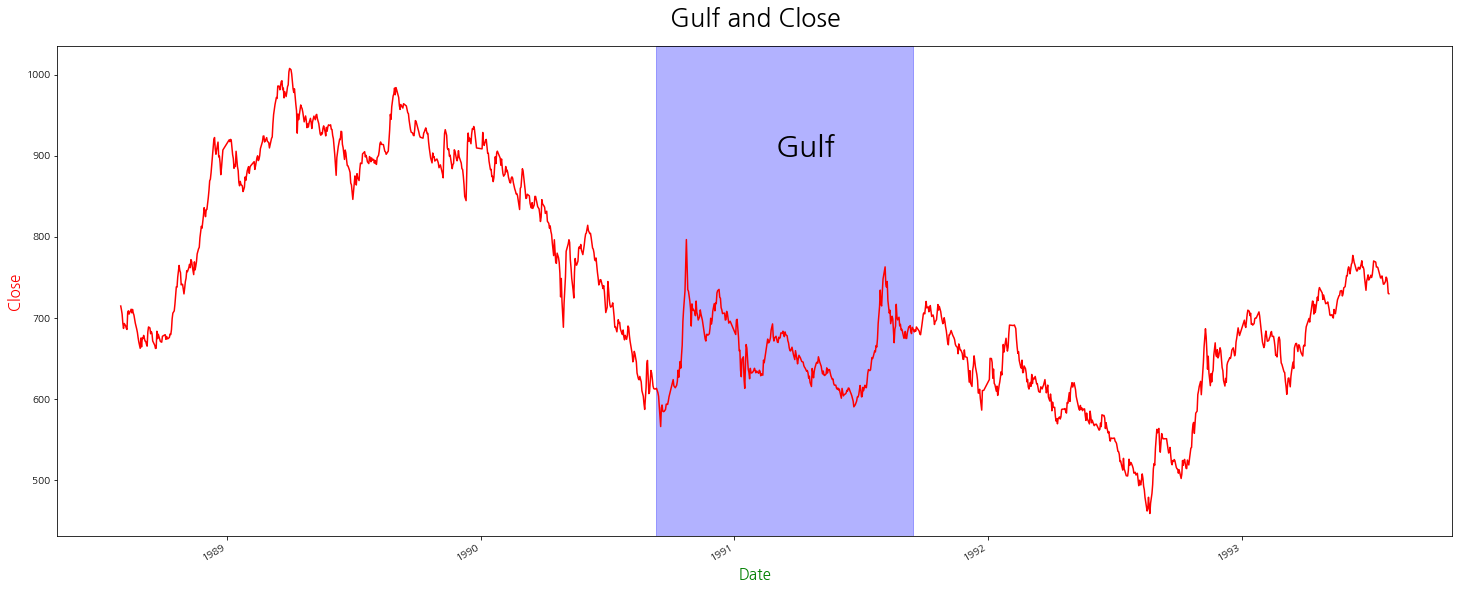

In [ ]:
# 걸프전 종가

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_w1['Close'].plot(color='red')

graph.axvspan('1990-09-10', '1991-09-15', color='blue', alpha=0.3)
graph.annotate('Gulf', xy=('1991-03', 900), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')

plt.title('Gulf and Close',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

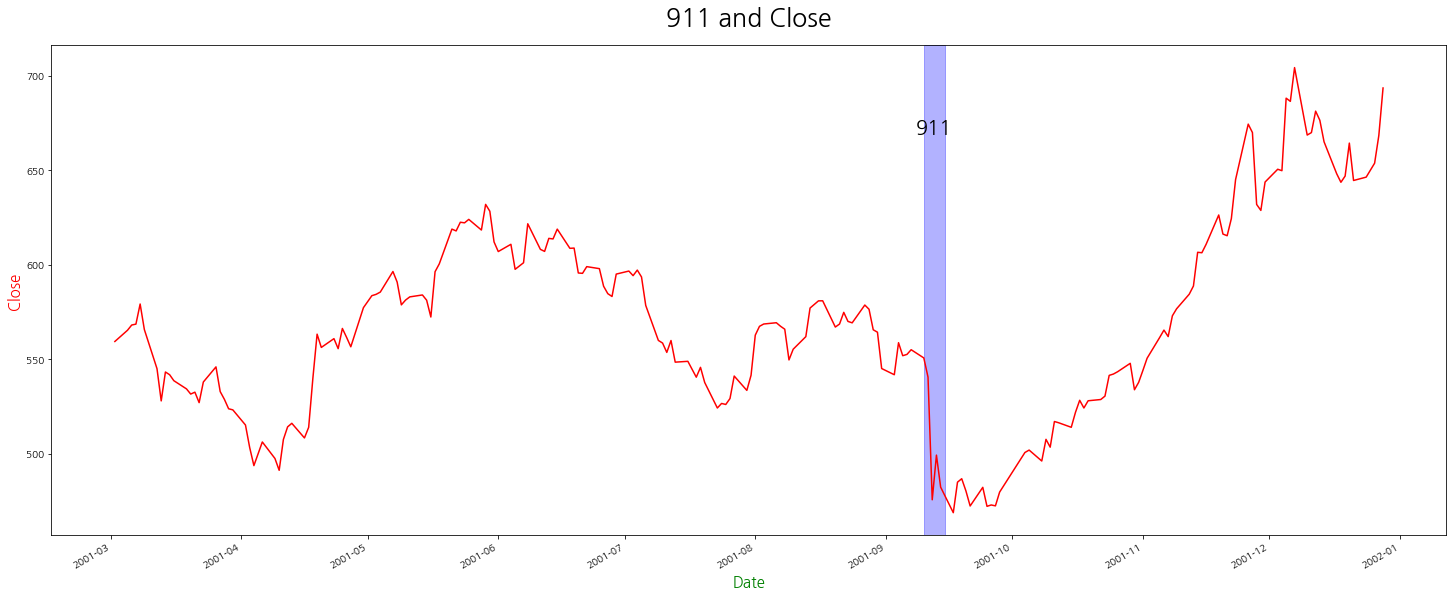

In [ ]:
# 911테러 종가

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_w2['Close'].plot(color='red')

graph.axvspan('2001-09-10', '2001-09-15', color='blue', alpha=0.3)
graph.annotate('911', xy=('2001-09-08', 670), fontsize=20)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')

plt.title('911 and Close',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

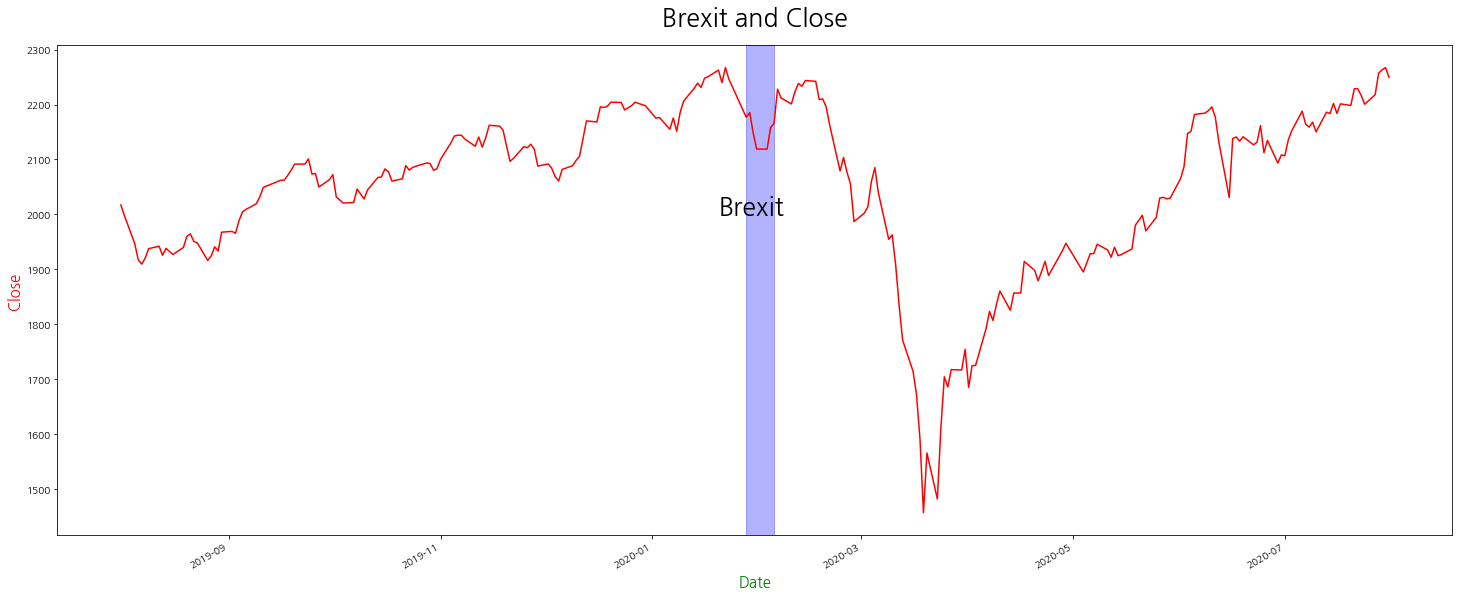

In [ ]:
# 브렉시트 종가

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_w3['Close'].plot(color='red')

graph.axvspan('2020-01-28', '2020-02-05', color='blue', alpha=0.3)
graph.annotate('Brexit', xy=('2020-01-20', 2000), fontsize=25)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')

plt.title('Brexit and Close',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

\
걸프전과 911테러가 사건 발생 직후 종합주가지수에 큰 타격을 입혔다는 것을 확인할 수 있습니다\.

반면에 브렉시트같은 경우 소폭의 감소를 제외하고는 영향을 받지 않았는데\
이는 다른 두개와 달리 브렉시트가 미국과의 직접적인 연관성이 없어서\
우리나라 종합주가지수에 타격이 없던 것으로 보입니다\.



###종합주가지수 거래량과의 관계

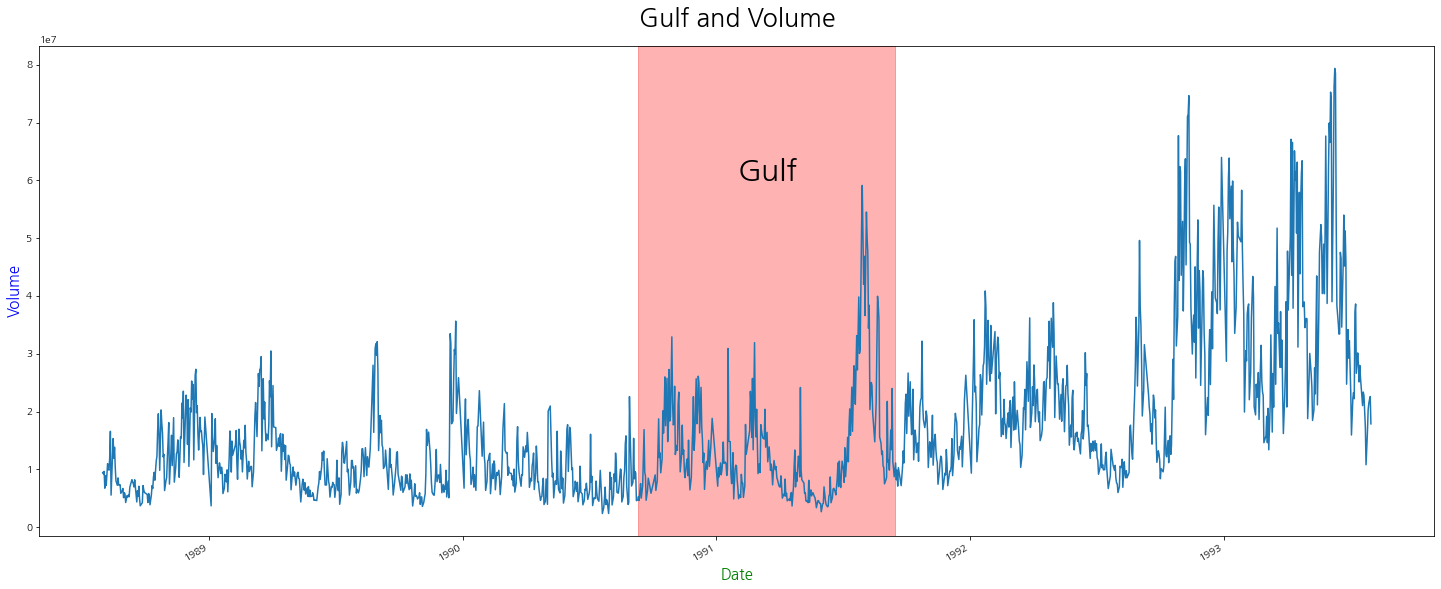

In [ ]:
# 걸프전 거래량

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_w1['Volume'].plot()

graph.axvspan('1990-09-10', '1991-09-15', color='red', alpha=0.3)
graph.annotate('Gulf', xy=('1991-02', 6e7), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')

plt.title('Gulf and Volume',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

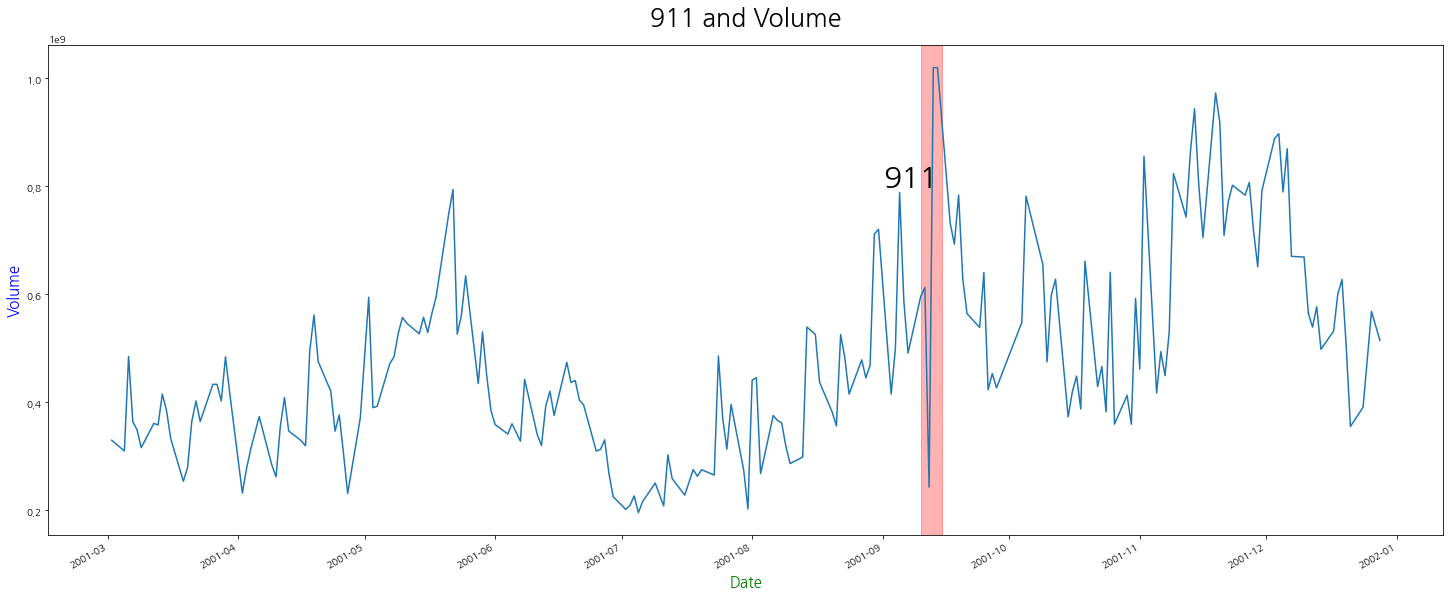

In [ ]:
# 911테러 거래량

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_w2['Volume'].plot()

graph.axvspan('2001-09-10', '2001-09-15', color='red', alpha=0.3)
graph.annotate('911', xy=('2001-09', 8e8), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')

plt.title('911 and Volume',fontsize=25, pad = 20)

fig.tight_layout()


plt.show()

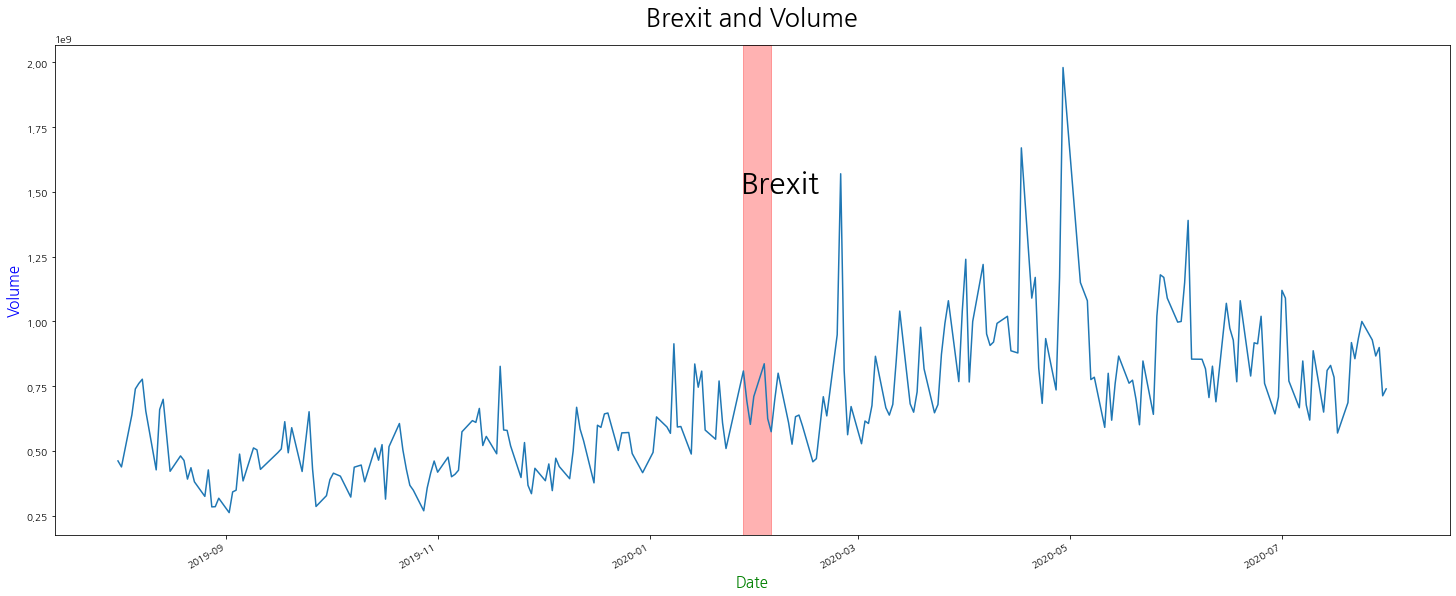

In [ ]:
# 브렉시트 거래량

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_w3['Volume'].plot()

graph.axvspan('2020-01-28', '2020-02-05', color='red', alpha=0.3)
graph.annotate('Brexit', xy=('2020-01-27', 15e8), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')

plt.title('Brexit and Volume',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

종합주가지수의 거래량은 911 테러에 매우 큰 영향을 받은 것으로 알 수 있습니다\
거래량이 대폭 감소하였다가 곧바로 다시 대폭 상승하였죠\
미국 경제의 중심지에서 발생한 사건이기도 하고 예상치 못한 사건이어서 큰 영향을 받은 것 같습니다.


\

물론 단편적인 몇 가지의 사건으로 판단할 수는 없겠지만 위 자료들을 보아\
전체적으로 우리나라 종합주가지수는 미국시장에 영향을 많이 받는 것으로 보이고\
또한 정치적 사건보다는 전쟁, 테러 등 직접적인 안전과 관련된 사건에 더 영향을 받는 것으로 알 수 있습니다.

## 5) 국내 재난 재해

마지막으로 국내 재난 재해가 종합주가지수에 미치는 영향을 알아보고자 합니다\
각 년대별 피해가 매우 컸던 태풍, 지진, 산불을 선정하였습니다.\
(사람에 의한 사건 및 재해들은 제외하였습니다)

In [ ]:
# 태풍 매미 : 2003년 9월 12 ~ 2003년 9월 13일
# 포항 지진 : 2017년 11월 15일
# 울진, 삼척 산불 : 2022년 3월 4일 ~ 2022년 3월 13일

#데이터 로드

kospi_d1 = fdr.DataReader('KS11', start='2003-07-01', end='2003-11-30')
kospi_d2 = fdr.DataReader('KS11', start='2017-09-01', end='2018-01-31')
kospi_d3 = fdr.DataReader('KS11', start='2022-01-11', end='2022-04-30')

###종합주가지수 종가와의 관계 분석

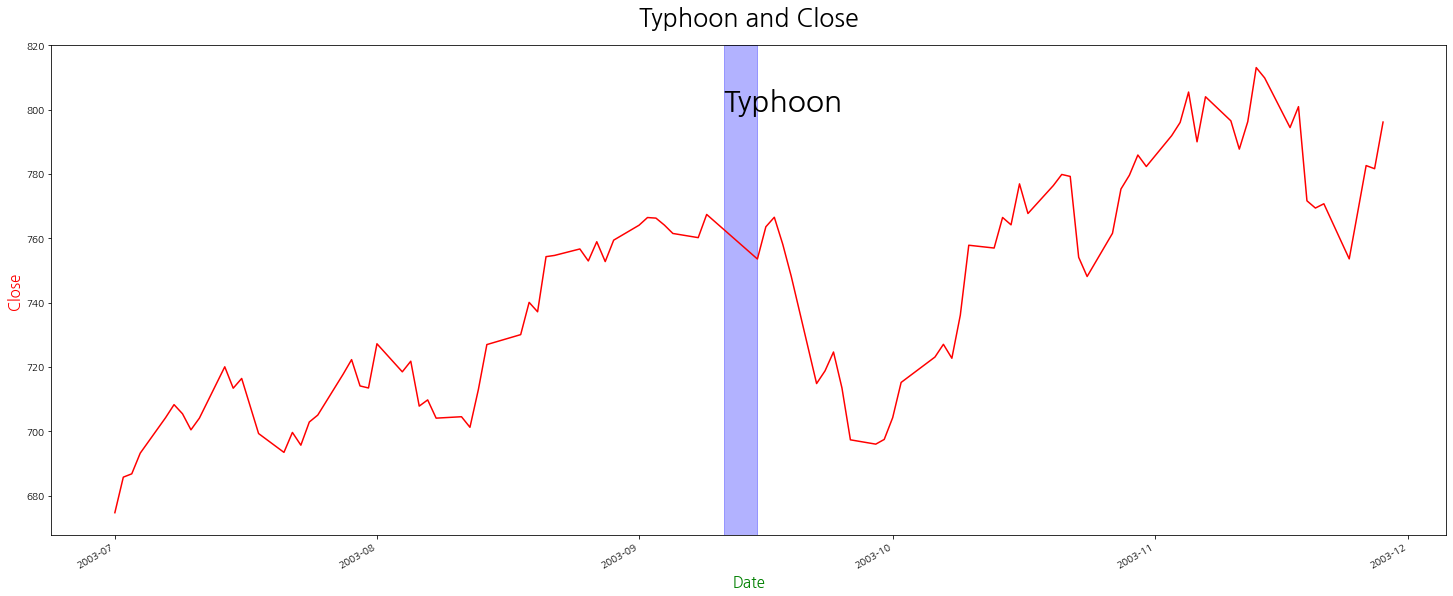

In [ ]:
# 태풍 매미 종가

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_d1['Close'].plot(color='red')

graph.axvspan('2003-09-11', '2003-09-15', color='blue', alpha=0.3)
graph.annotate('Typhoon', xy=('2003-09-11', 800), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')

plt.title('Typhoon and Close',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

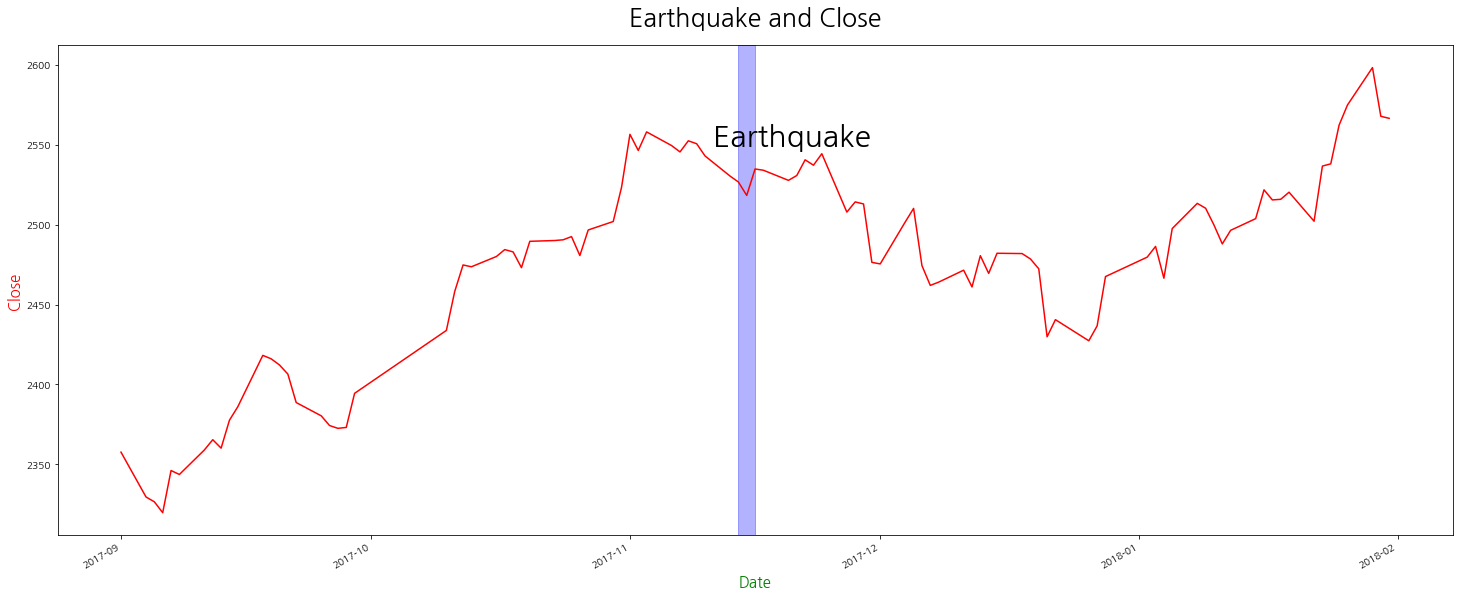

In [ ]:
# 포항 지진 종가

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_d2['Close'].plot(color='red')

graph.axvspan('2017-11-14', '2017-11-16', color='blue', alpha=0.3)
graph.annotate('Earthquake', xy=('2017-11-11', 2550), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')

plt.title('Earthquake and Close',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

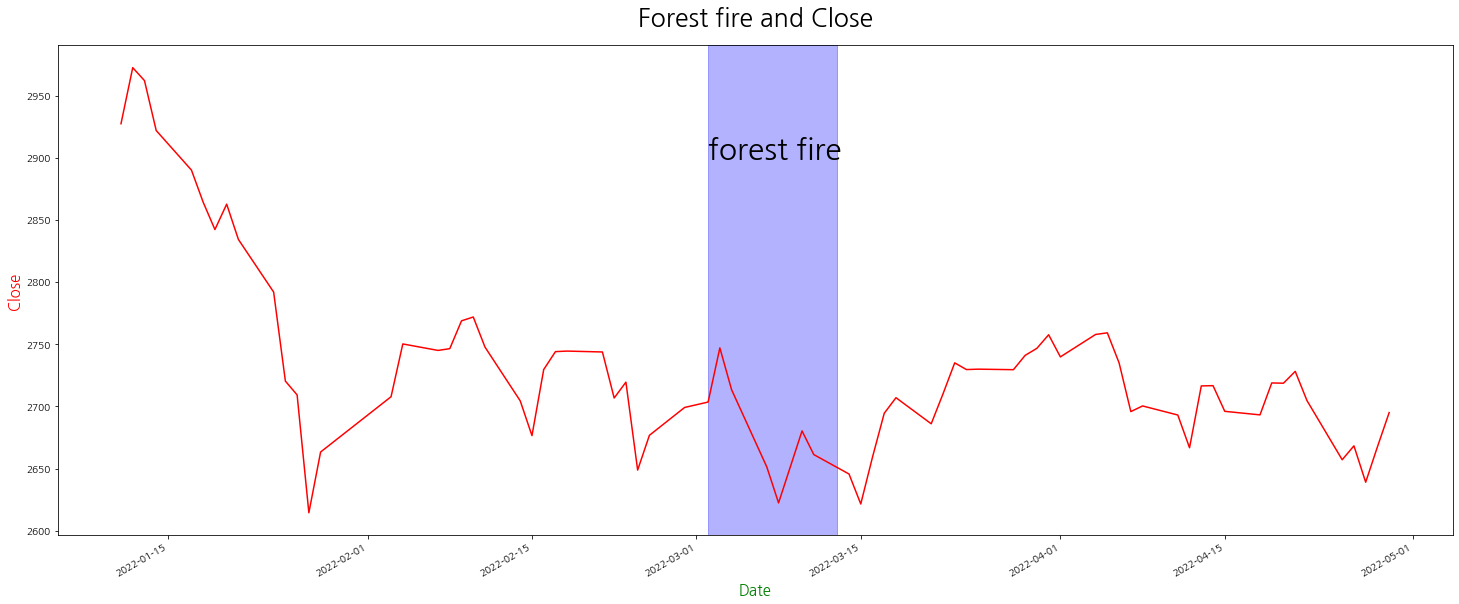

In [ ]:
# 울진, 삼척 산불 종가
plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_d3['Close'].plot(color='red')

graph.axvspan('2022-03-02', '2022-03-13', color='blue', alpha=0.3)
graph.annotate('forest fire', xy=('2022-03-02', 2900), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Close', fontsize=15, color='red')

plt.title('Forest fire and Close',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

\
위 3가지 재난 재해는 종합주가지수 종가에 거의 영향을 미치지 않는 것 처럼 보입니다.

\
### 종합주가지수 거래량과의 관계

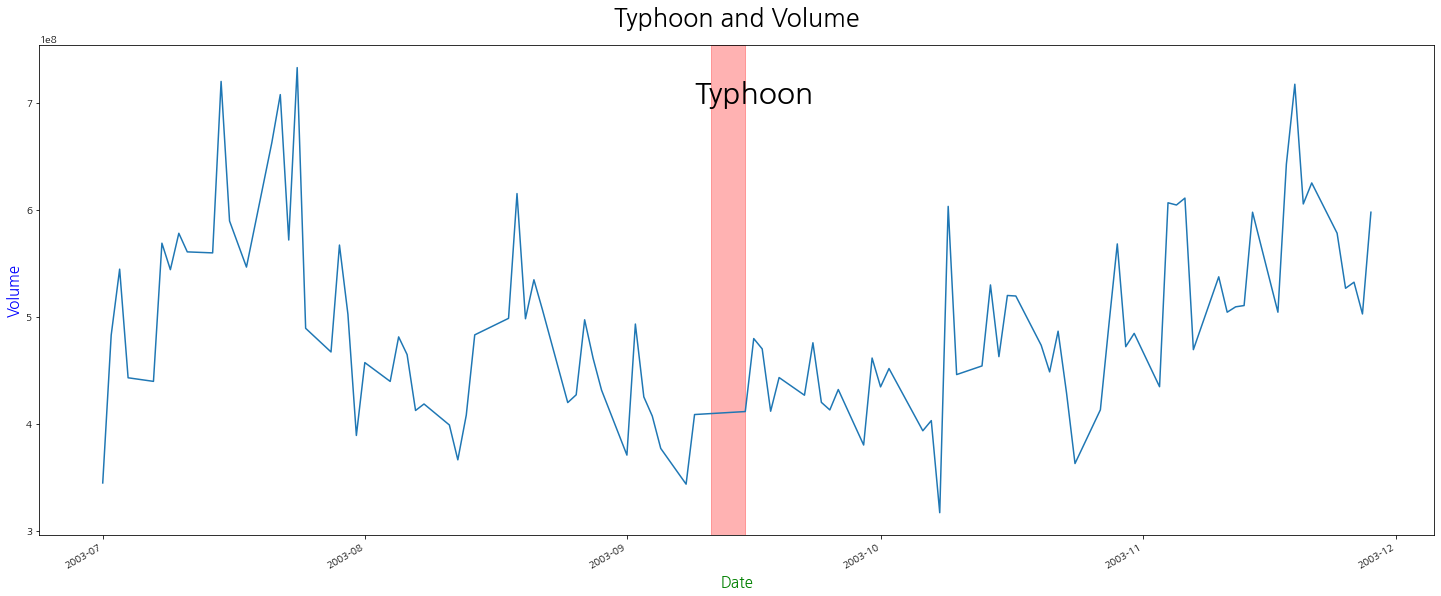

In [ ]:
# 태풍 매미 거래량

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_d1['Volume'].plot()

graph.axvspan('2003-09-11', '2003-09-15', color='red', alpha=0.3)
graph.annotate('Typhoon', xy=('2003-09-09', 7e8), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')

plt.title('Typhoon and Volume',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

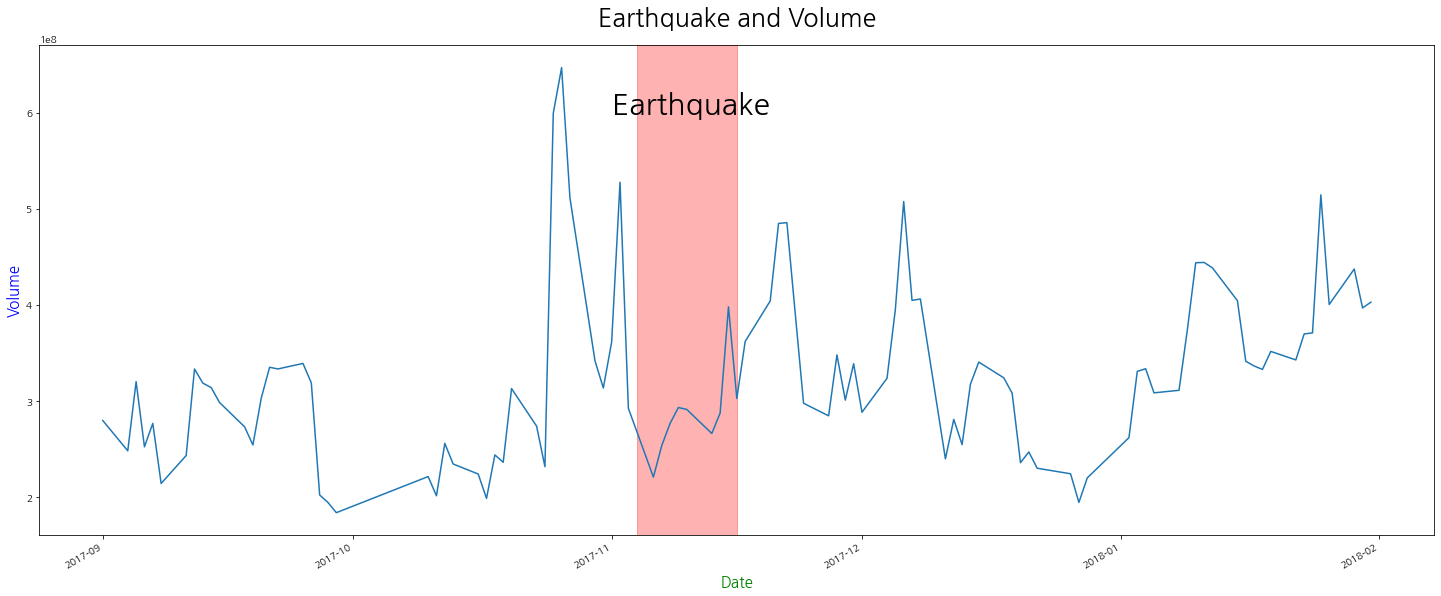

In [ ]:
# 포항 지진 거래량

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_d2['Volume'].plot()

graph.axvspan('2017-11-04', '2017-11-16', color='red', alpha=0.3)
graph.annotate('Earthquake', xy=('2017-11-01', 6e8), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')

plt.title('Earthquake and Volume',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

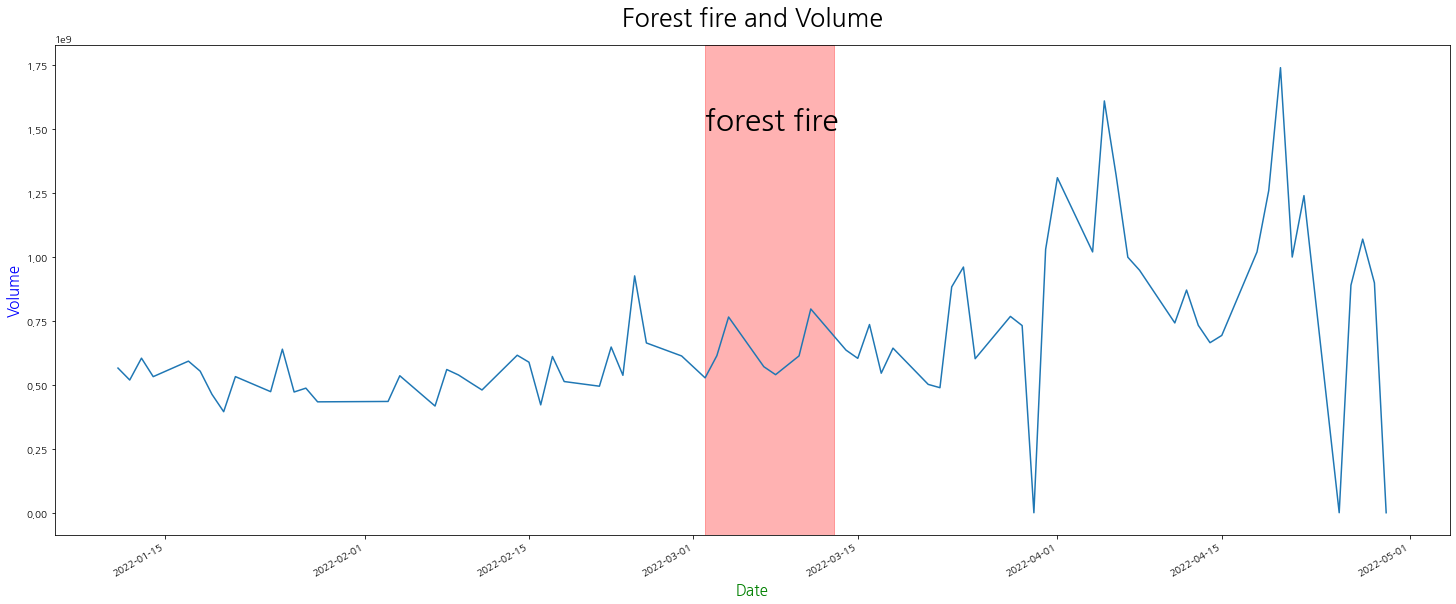

In [ ]:
# 울진, 삼척 산불 거래량

plt.rcParams["figure.figsize"] = (25,10)
fig.set_facecolor('white') 

graph= kospi_d3['Volume'].plot()

graph.axvspan('2022-03-02', '2022-03-13', color='red', alpha=0.3)
graph.annotate('forest fire', xy=('2022-03-02', 15e8), fontsize=30)

graph.set_xlabel('Date', fontsize=15, color='green')
graph.set_ylabel('Volume', fontsize=15, color='blue')

plt.title('Forest fire and Volume',fontsize=25, pad = 20)

fig.tight_layout()

plt.show()

종합주가 지수의 거래량 또한 국내 재난 재해에는 큰 영향을 받지 않는 것 처럼 보입니다.

## 마치며


본 분석을 통해 분야별 뉴스 개수와 검색량, 각종 국내외 이슈들이 KOSPI 주가와 거래량에 어떤 영향을 미치는지 알아보았습니다. 

물론 KOSPI에 영향을 미치는 요인이 단순히 뉴스, 검색량 뿐만아니라\
수 많은 외부 환경적 요소와 복잡한 이해관계가 얽혀있다고 생각합니다

하지만 KOSPI가 그동안 어떠한 사건과 분야에 민감하게 움직였는지 조금이나마 알 수 있었고\
앞으로 벌어질 수 있는 사건이나 이슈에 대해 투자자로써 어떻게 행동해야 할 지 배울 수 있었습니다.

시각화는 익숙치 않아 어려웠지만 열심히 노력했고\
시간이 더 주어졌다면 더 높은 퀄리티와 더 많은 분석을 할 수 있었겠다는 아쉬움도 있습니다.

하지만 이번 기회로 많은 것을 배웠고 다른 시각화 competition에 도전해 보고 싶습니다! 

감사합니다!